![image](https://py-rates.fr/assets/welcomePage/logoSmall.png)
# AI level models

## 1) Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import seaborn as sns; sns.set_theme()
%matplotlib inline
from dateutil import parser
from locale import normalize

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
# from modules.ordinal import OrdinalClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate

from copy import deepcopy

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.inspection import permutation_importance

import pickle


from dill import dump

### 5.1 Import data from pickle

In [2]:
with open('pickle/FEATURES_CONSTANTS', 'rb') as f:
    ALL_KEYS = pickle.load(f)

with open('pickle/FEATURES', 'rb') as f:
    levels_processed_dataframes = pickle.load(f)
    
with open('pickle/LABELS_KEY', 'rb') as f:
    LABELS_KEY = pickle.load(f)
    
with open('pickle/FEATURES_SETS_KEY', 'rb') as f:
    FEATURES_SETS = pickle.load(f)
    
with open('pickle/LEVELS_KEYS', 'rb') as f:
    LEVELS_KEYS = pickle.load(f)  
        
with open('pickle/RECEIVED_HELP_KEYS', 'rb') as f:
    RECEIVED_HELP_KEYS = pickle.load(f)
    
with open('pickle/TIME_FEATURES_KEYS_TOTAL', 'rb') as f:
    TIME_FEATURES_KEYS_TOTAL = pickle.load(f)  

# ALL_KEYS = ALL_KEYS 
# levels_processed_dataframes =levels_processed_dataframes
# LABELS_KEY =LABELS_KEY
# FEATURES_SETS =FEATURES_SETS
# LEVELS_KEYS =LEVELS_KEYS
# RECEIVED_HELP_KEYS =RECEIVED_HELP_KEYS
# TIME_FEATURES_KEYS_TOTAL =TIME_FEATURES_KEYS_TOTAL

### 5.2 Constants

In [3]:
#  Features keys
NB_USER_STOPPED_EXECUTION_KEY = "EX_tot_user_stopped"
NB_COMPLETED_EXECUTION_KEY = "EX_tot_executed"
GAME_ID_KEY = "game_id"

# Level labels
LEVEL_TRANSLATION = {
    "Level1" : "Niveau 1",
    "Level2" : "Niveau 2",
    "Level3" : "Niveau 3",
    "Level4" : "Niveau 4",
    "Level5" : "Niveau 5",
    "Level6" : "Niveau 6",
    "Level7" : "Niveau 7",
    "Level8" : "Niveau 8",
}


#  ML Constants
TEST_SET_RATIO = 0.20
RANDOM_STATE_SEED = 42
NB_FOLDS = 5
GROUP_KEY = GAME_ID_KEY
CORRELATION_THRESHOLD = 0.8
MIN_DIFFERENT_VALUES = 2

# Used to calculate scores in a multi-class context
# METRIC = "macro"
METRIC = "weighted"
# For non defined precision when no positive detected
ZERO_DIVISION = 0
# ZERO_DIVISION = 1
# ZERO_DIVISION = "warn"



Feature set selection

In [4]:
# "all_features_help_received"
# "all_features_help_requested"
# "all_features_nohelp"
# "sum_features_help_received"
# "sum_features_help_requested"
# "sum_features_nohelp"
# "mean_sd_rate_features_help_received"
# "mean_sd_rate_features_help_requested"
# "mean_sd_rate_features_nohelp"
# "mean_sd_rate_features_nohelp_nosub"
# "mean_rate_features_nohelp_nosub"
# "mean_rate_features_nohelp"
# "mean_rate_features_help_received_nosub"
# "mean_rate_features_help_received"

feature_set_columns = FEATURES_SETS["mean_rate_features_nohelp_nosub"]
feature_set_columns

['CO_avg_base_disp_time',
 'CO_avg_var_disp_time',
 'CO_avg_condi_disp_time',
 'CO_avg_for_disp_time',
 'CO_avg_while_disp_time',
 'CO_rate_code_editor_copied',
 'CO_rate_control_function_copied',
 'CO_rate_base_program_copied',
 'CO_rate_base_error_copied',
 'CO_rate_base_structuration_copied',
 'CO_rate_base_comment_copied',
 'CO_rate_var_creation_copied',
 'CO_rate_var_modif_copied',
 'CO_rate_var_usage_copied',
 'CO_rate_var_type_copied',
 'CO_rate_condi_1bran_copied',
 'CO_rate_condi_2bran_copied',
 'CO_rate_condi_3bran_copied',
 'CO_rate_for_simple_copied',
 'CO_rate_for_counter_0_copied',
 'CO_rate_for_counter_n_copied',
 'CO_rate_while_simple_copied',
 'CO_rate_pasted',
 'GA_avg_open_chest_loc_error',
 'GA_avg_open_chest_key_error',
 'GA_avg_read_message_loc_error',
 'GA_avg_walk_loc_error',
 'GA_avg_not_allowed_func_error',
 'GA_avg_function_param_error',
 'GA_avg_spike_touch_lost',
 'GA_avg_barrel_explosion_lost',
 'GA_avg_pirate_shot_lost',
 'EX_avg_too_many_lines_error',
 '

### 5.3 Quick look at data structure

------------------ Level1 ------------------
Nb of instances : 176, Nb of features : 63, Nb of relevant : 35
Class distribution
------------------ Level2 ------------------
Nb of instances : 35, Nb of features : 63, Nb of relevant : 33
Class distribution
------------------ Level3 ------------------
Nb of instances : 408, Nb of features : 63, Nb of relevant : 39
Class distribution
------------------ Level4 ------------------
Nb of instances : 338, Nb of features : 63, Nb of relevant : 46
Class distribution
------------------ Level5 ------------------
Nb of instances : 164, Nb of features : 63, Nb of relevant : 44
Class distribution
------------------ Level6 ------------------
Nb of instances : 67, Nb of features : 63, Nb of relevant : 36
Class distribution
------------------ Level7 ------------------
Nb of instances : 19, Nb of features : 63, Nb of relevant : 30
Class distribution
------------------ Level8 ------------------
Nb of instances : 6, Nb of features : 63, Nb of relevant : 29


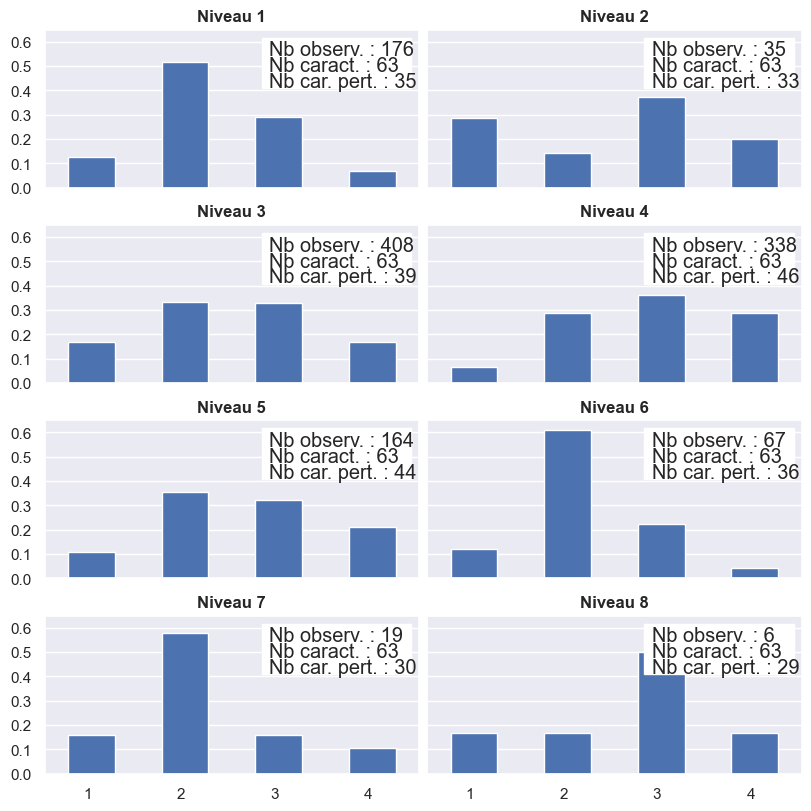

In [5]:
fig, axs = plt.subplots(4,2, constrained_layout=True,figsize=[8,8])
index = 0

for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    col = index % 2
    row = index // 2
    # print("col: ", col)
    # print("row: ", row)
    # Feature selection
    level_processed_dataframe = level_processed_dataframe[feature_set_columns]
    # Drop irrelevant feature (same values) for analysis
    unused_features = []
    for key in level_processed_dataframe.columns:
        nb_values = level_processed_dataframe[key].value_counts()
        if len(nb_values) < MIN_DIFFERENT_VALUES: 
            unused_features.append(key)
    nb_students = len(levels_processed_dataframes[level_key][GAME_ID_KEY].value_counts())
    nb_instance = level_processed_dataframe.shape[0]
    nb_features = level_processed_dataframe.shape[1]-2
    nb_relevant = nb_features - len(unused_features)
    print(f"Nb of instances : {nb_instance}, Nb of features : {nb_features}, Nb of relevant : {nb_relevant}")
    print("Class distribution")
    counts = level_processed_dataframe[LABELS_KEY].value_counts(normalize=True).sort_index()
    counts.plot(kind='bar', ax = axs[row,col])
    axs[row,col].set_title(LEVEL_TRANSLATION[level_key],fontweight='bold')
    axs[row,col].set_ylim([0, 0.65])
    axs[row,col].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
    axs[row,col].grid(axis='x')
    # axs[row,col].text(0.6, 0.93, f"Nb élèves : {nb_students}", horizontalalignment='left', verticalalignment='top', fontsize='large', transform=axs[row,col].transAxes)
    axs[row,col].text(0.6, 0.93, f"Nb observ. : {nb_instance}", horizontalalignment='left', verticalalignment='top', fontsize='large', transform=axs[row,col].transAxes)
    axs[row,col].text(0.6, 0.83, f"Nb caract. : {nb_features}", horizontalalignment='left', verticalalignment='top', fontsize='large', transform=axs[row,col].transAxes)
    axs[row,col].text(0.6, 0.73, f"Nb car. pert. : {nb_relevant}", horizontalalignment='left', verticalalignment='top', fontsize='large', transform=axs[row,col].transAxes)
    axs[row,col].add_patch(ptch.Rectangle((0.58,0.63), 0.4, 0.32, color="white", transform=axs[row,col].transAxes))
    
    if col !=0 :
        # axs[row,col].get_yaxis().set_visible(False)
        axs[row,col].set_yticklabels([])
    
        
    if row !=3 :
        axs[row,col].get_xaxis().set_visible(False)
    else:
        for label in axs[row,col].get_xticklabels():
                label.set_ha("right")
                label.set_rotation(0)
    index += 1

# plt.savefig("images/quick_look_data.png", dpi=800)

### 5.4 Delete level 2, level 7 and 8 data (not enough data)

In [6]:
del levels_processed_dataframes[LEVELS_KEYS[1]] #level2
del levels_processed_dataframes[LEVELS_KEYS[5]] #level6
del levels_processed_dataframes[LEVELS_KEYS[6]] #level7
del levels_processed_dataframes[LEVELS_KEYS[7]] #level8

### 5.5 Data analysis

------------------ Level1 ------------------
Unused features: 
['CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_type_copied', 'GA_avg_open_chest_key_error', 'GA_avg_read_message_loc_error', 'GA_avg_spike_touch_lost', 'GA_avg_barrel_explosion_lost', 'GA_avg_pirate_shot_lost', 'CO_avg_boolean_impl', 'CO_avg_if_branch_impl', 'CO_avg_elif_branch_impl', 'CO_avg_else_branch_impl', 'CO_avg_for_counter_0_impl', 'CO_avg_for_counter_n_impl', 'CO_avg_while_impl', 'GA_avg_open_ctr_fun_used', 'GA_avg_jump_ctr_fun_used', 'GA_avg_jump_height_ctr_fun_used', 'GA_avg_jump_high_ctr_fun_used', 'GA_avg_get_height_ctr_fun_used', 'GA_avg_read_string_ctr_fun_used', 'GA_avg_read_int_ctr_fun_used', 'GA_avg_attack_ctr_fun_used', 'GA_avg_detect_obstacle_ctr_fun_used', 'GA_avg_turn_ctr_fun_used', 'GA_avg_shoot_ctr_fun_used']
Relevant features:  37
Total features:  65
Describe:         CO_avg_base_disp_time  CO_avg_var_disp

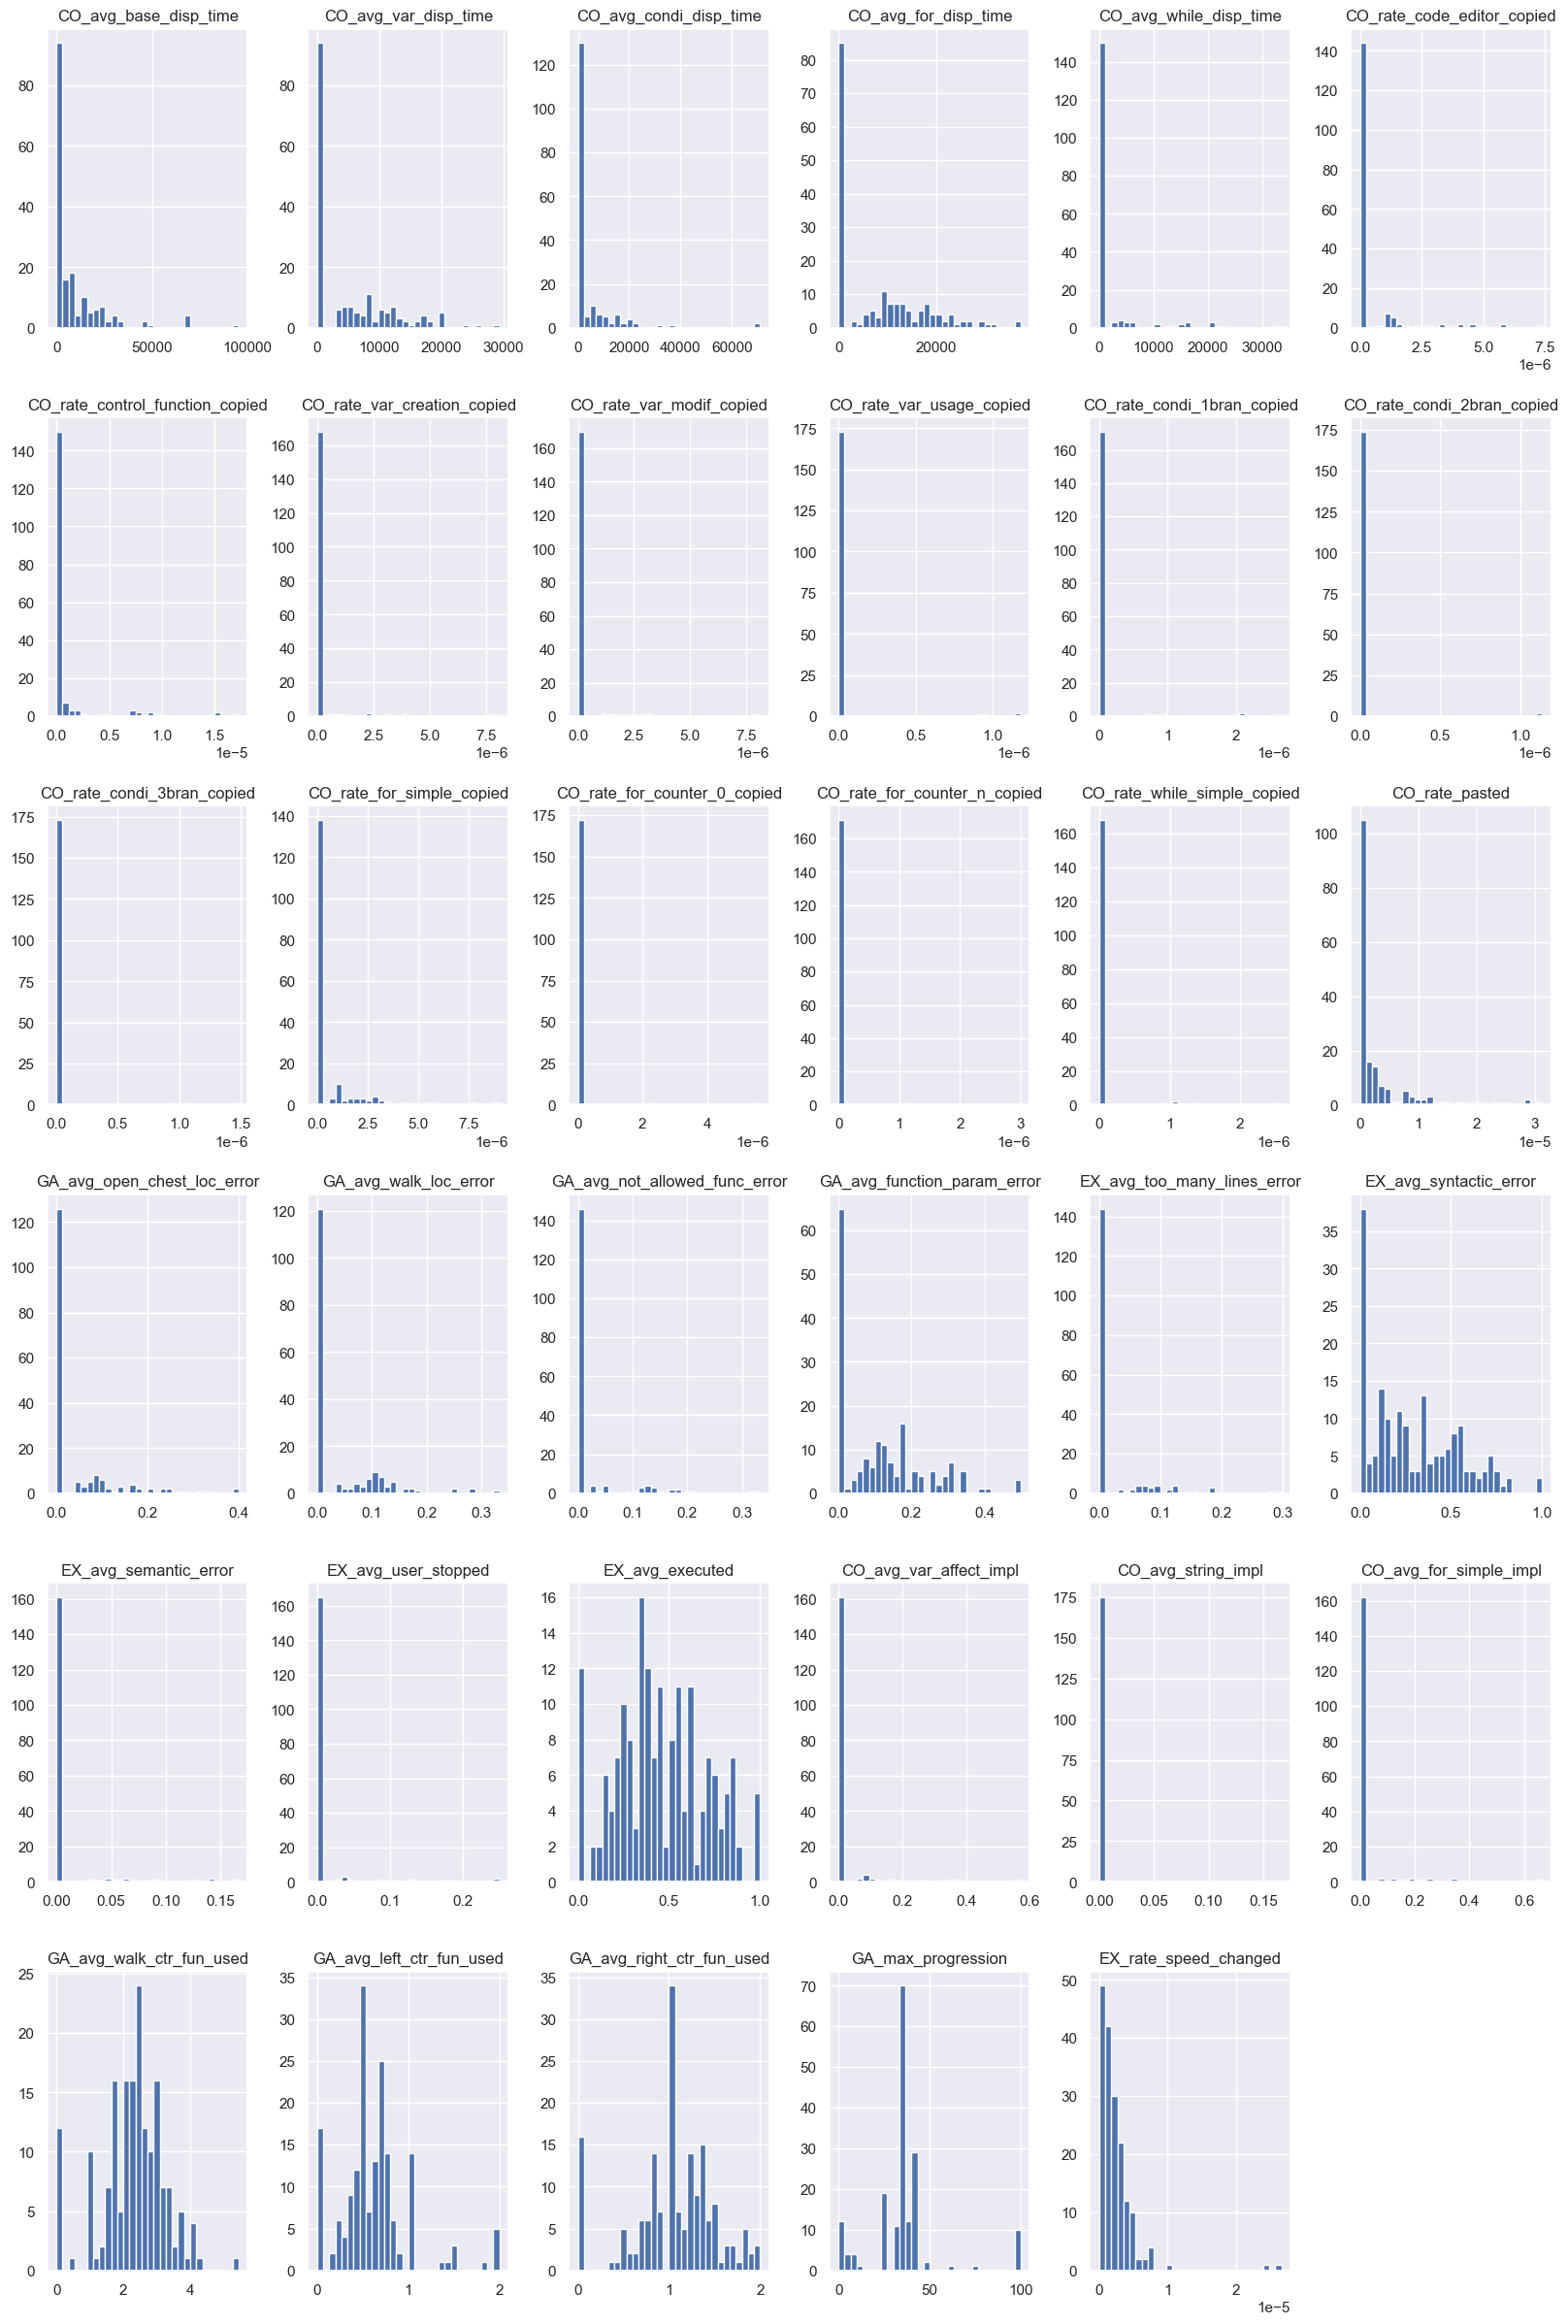

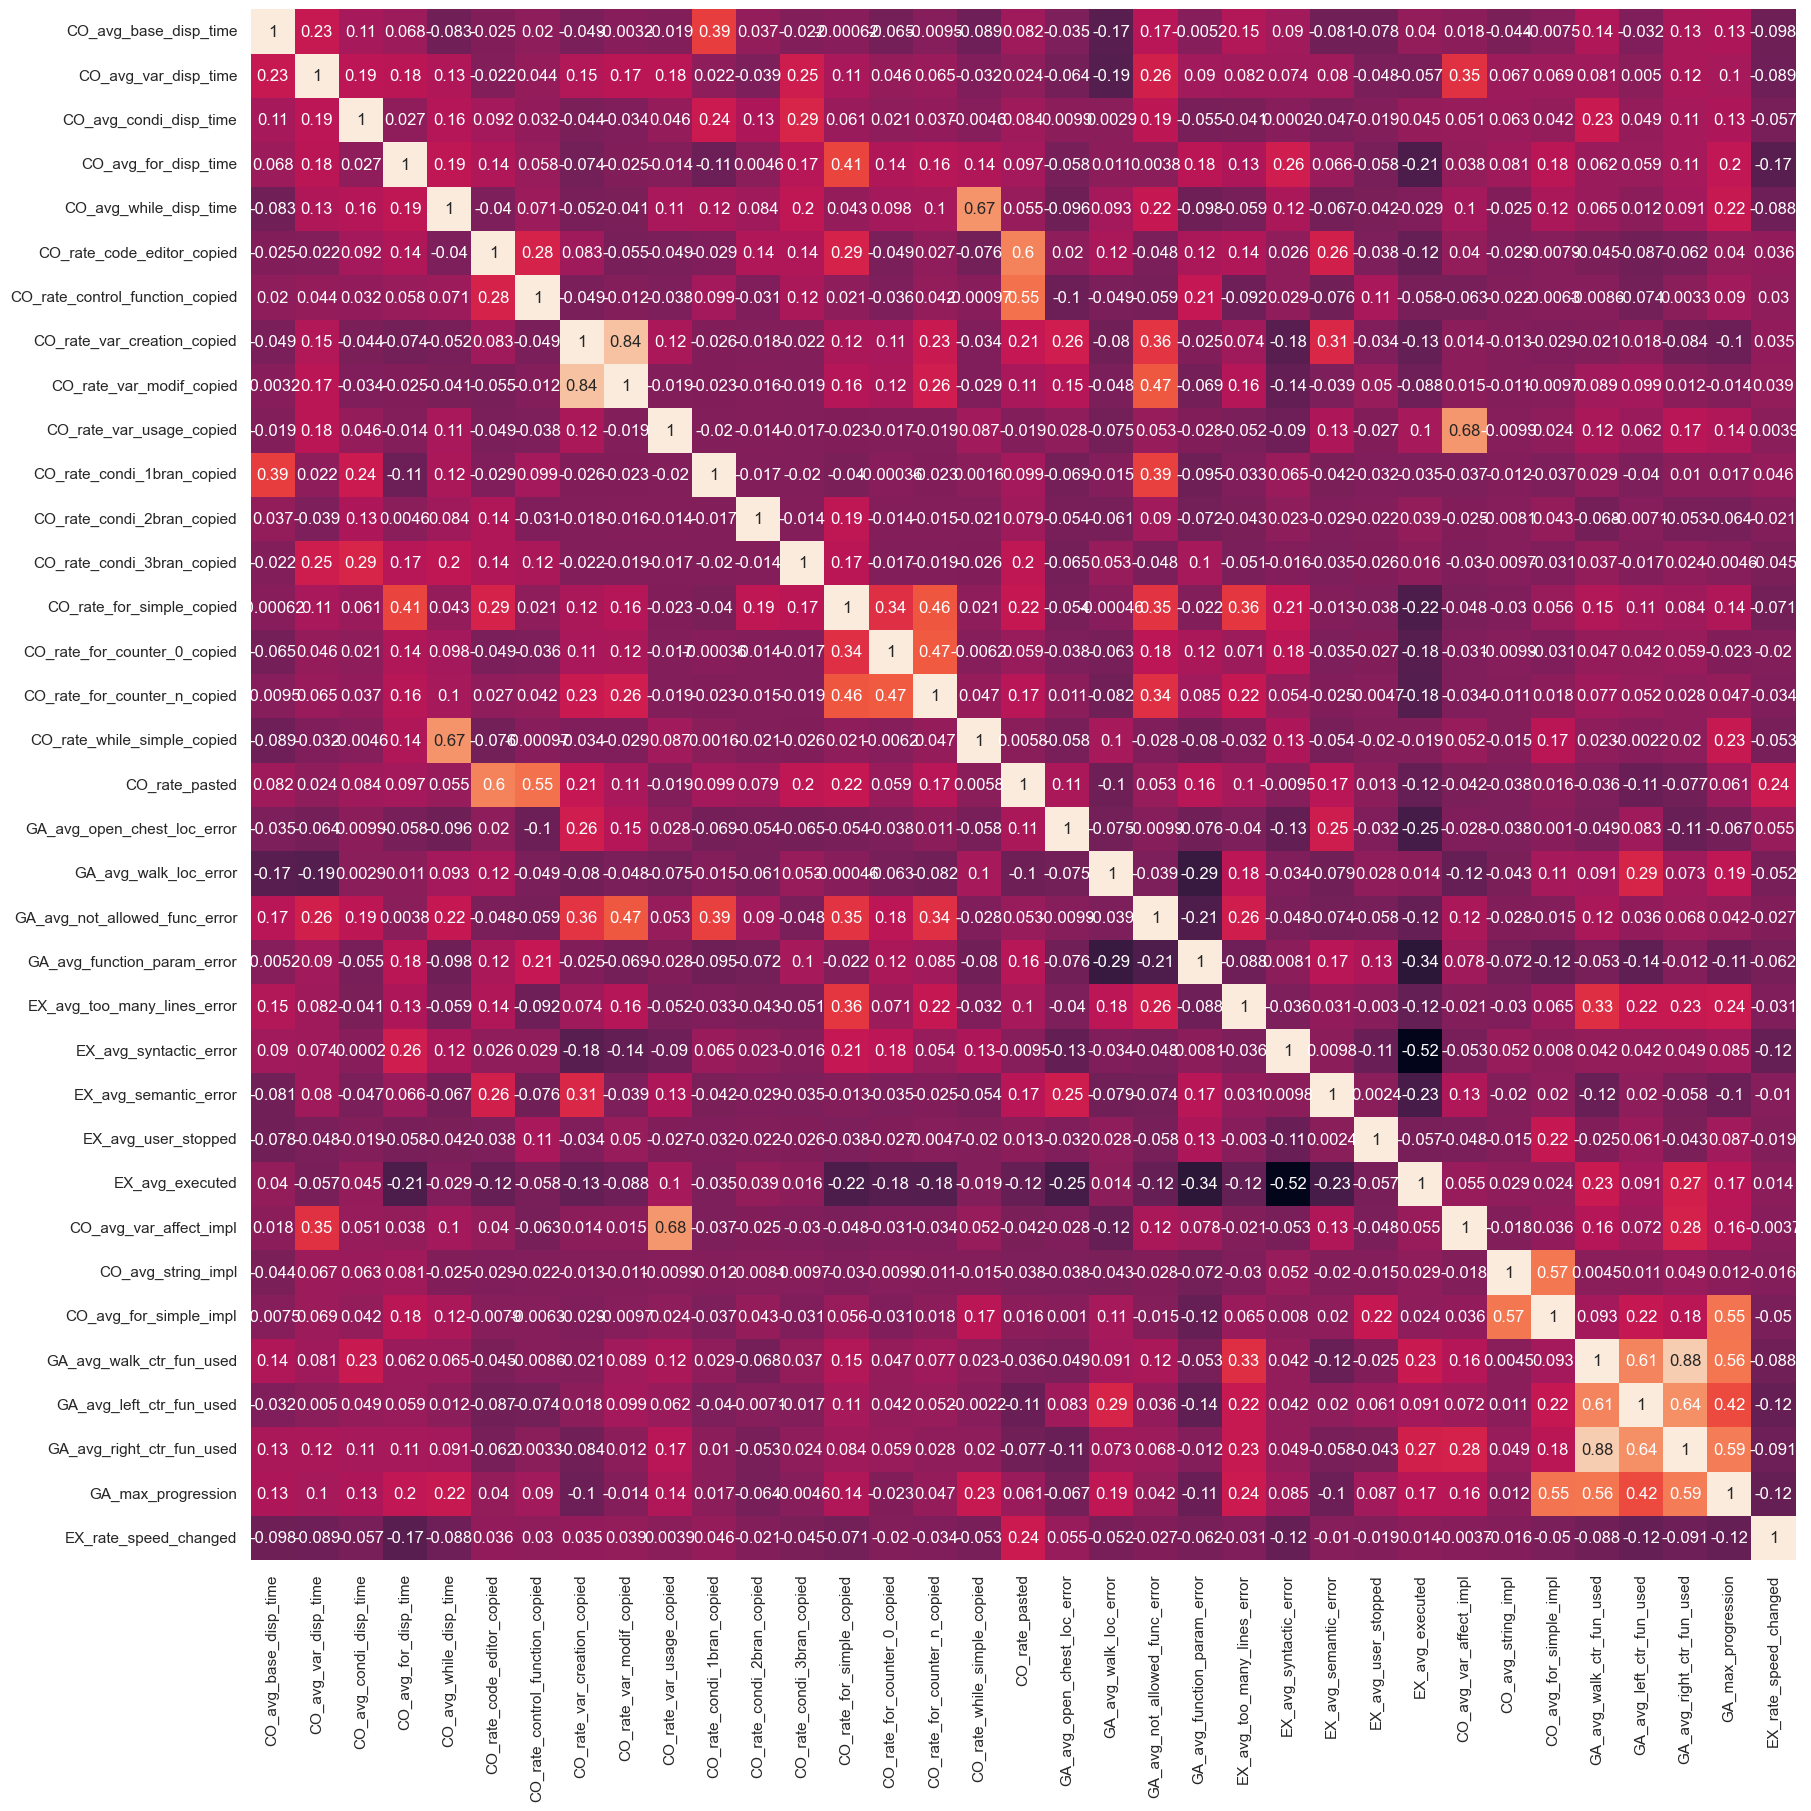

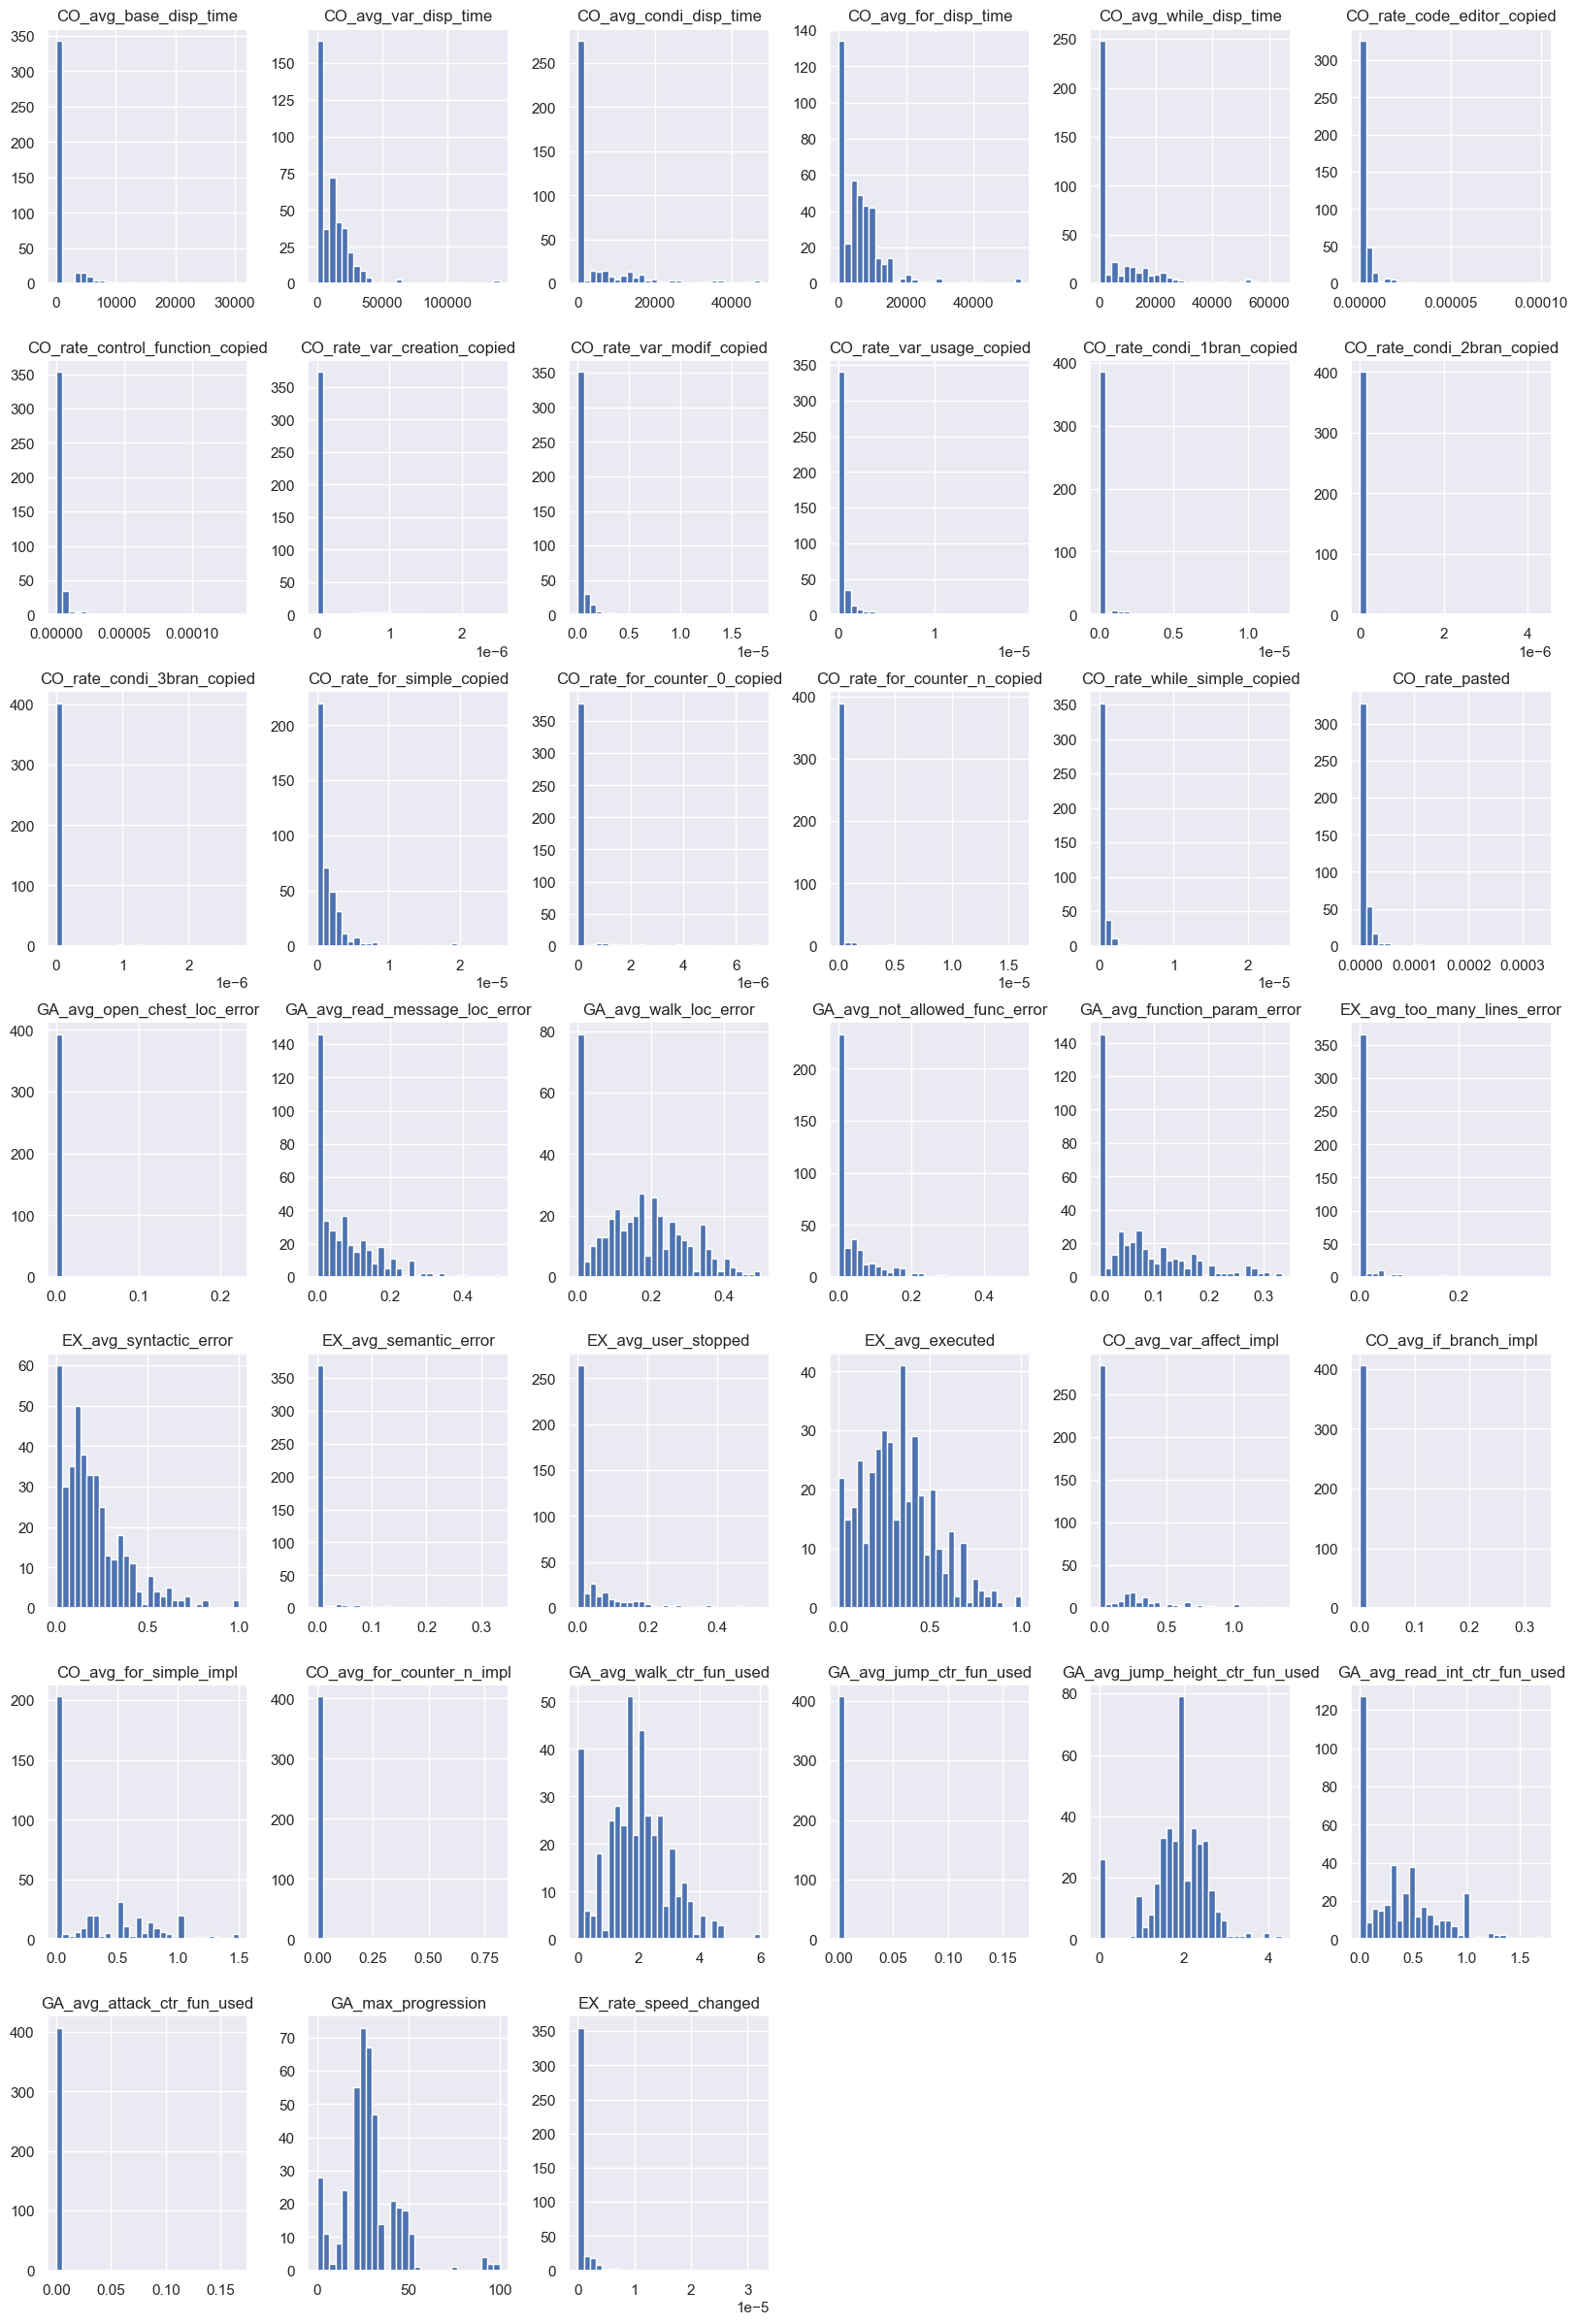

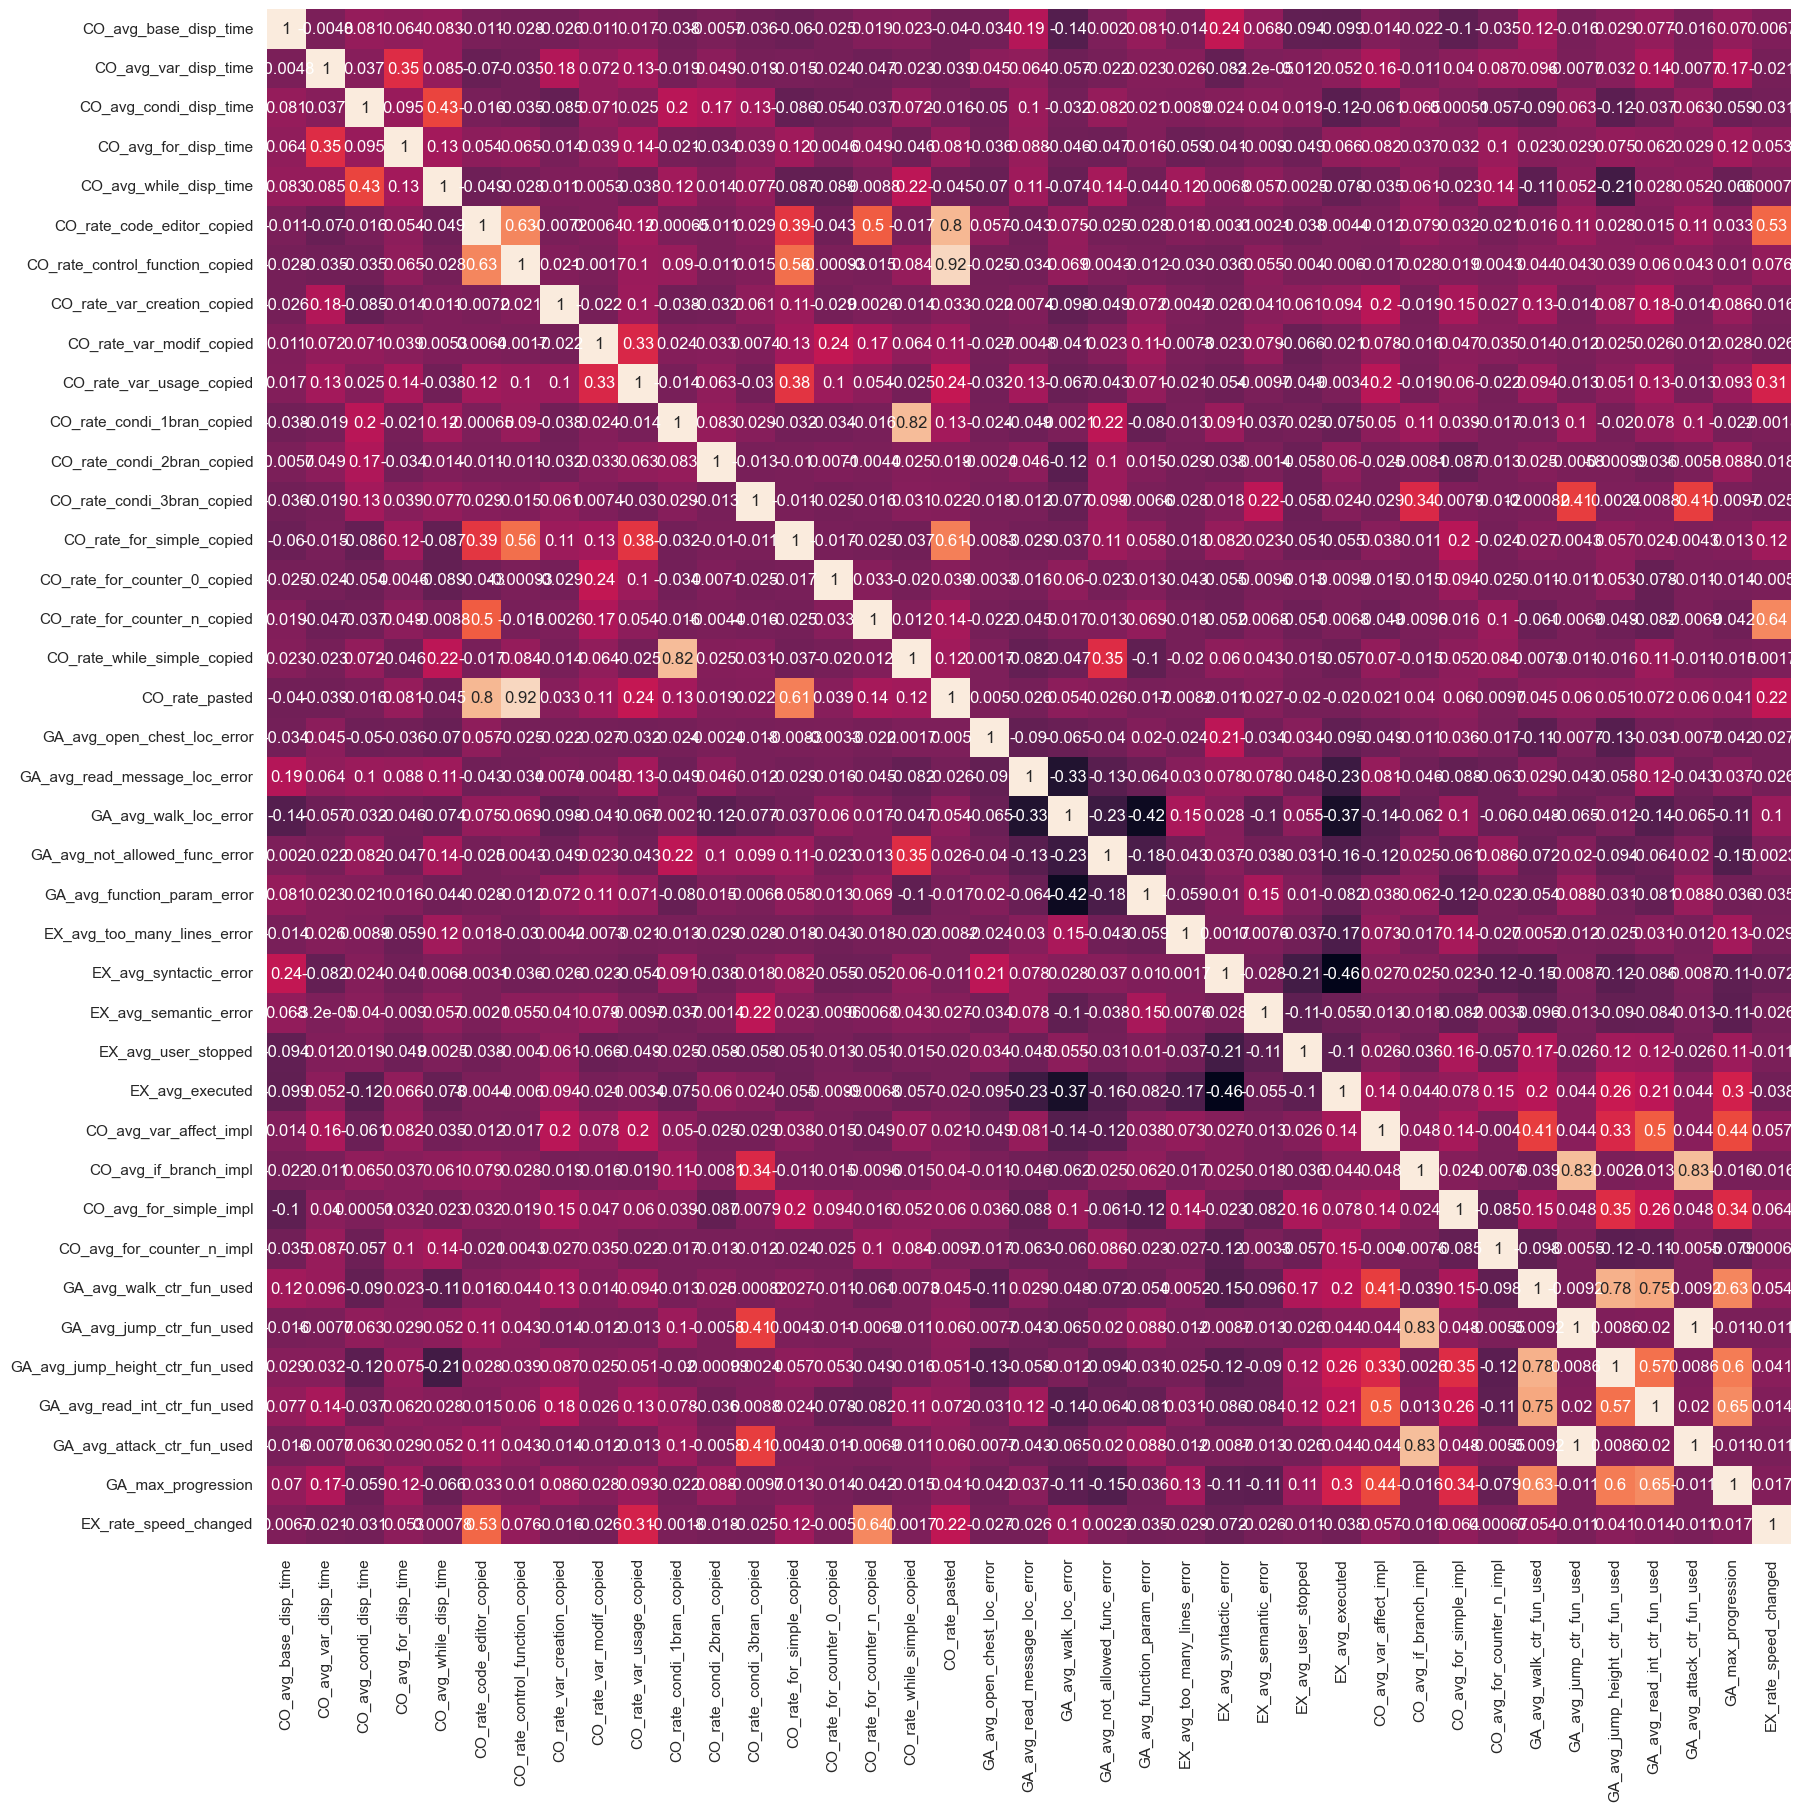

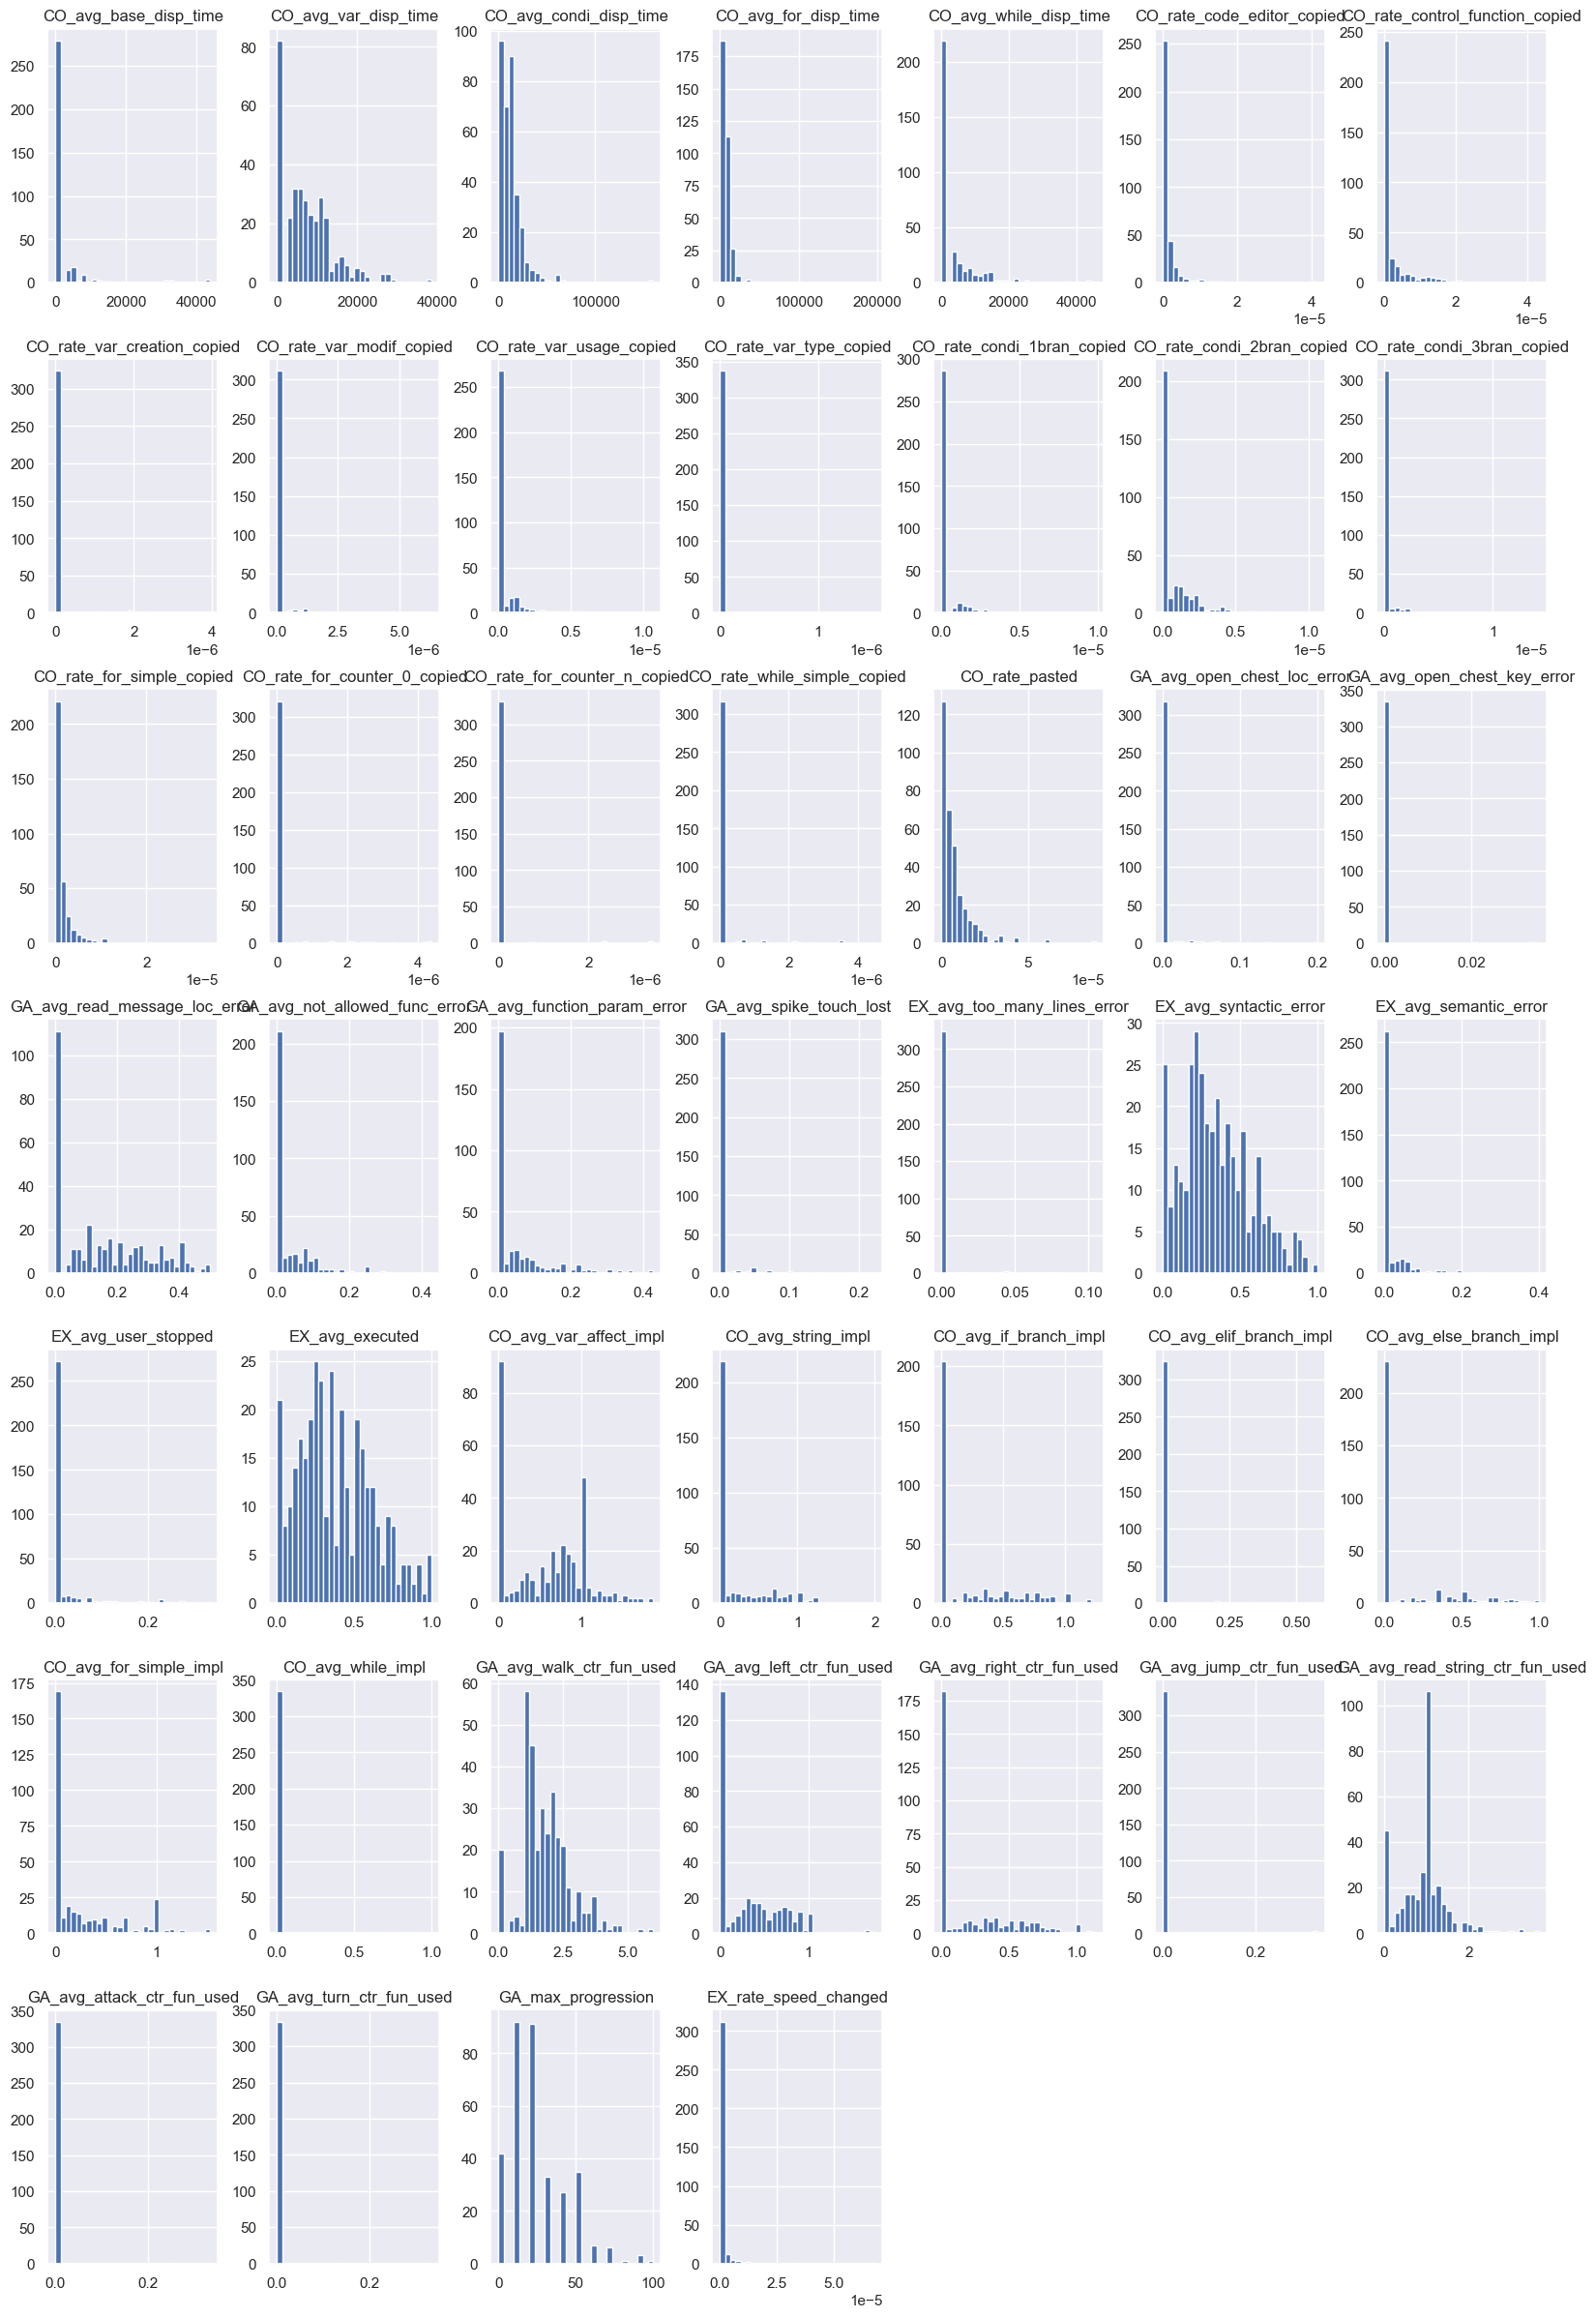

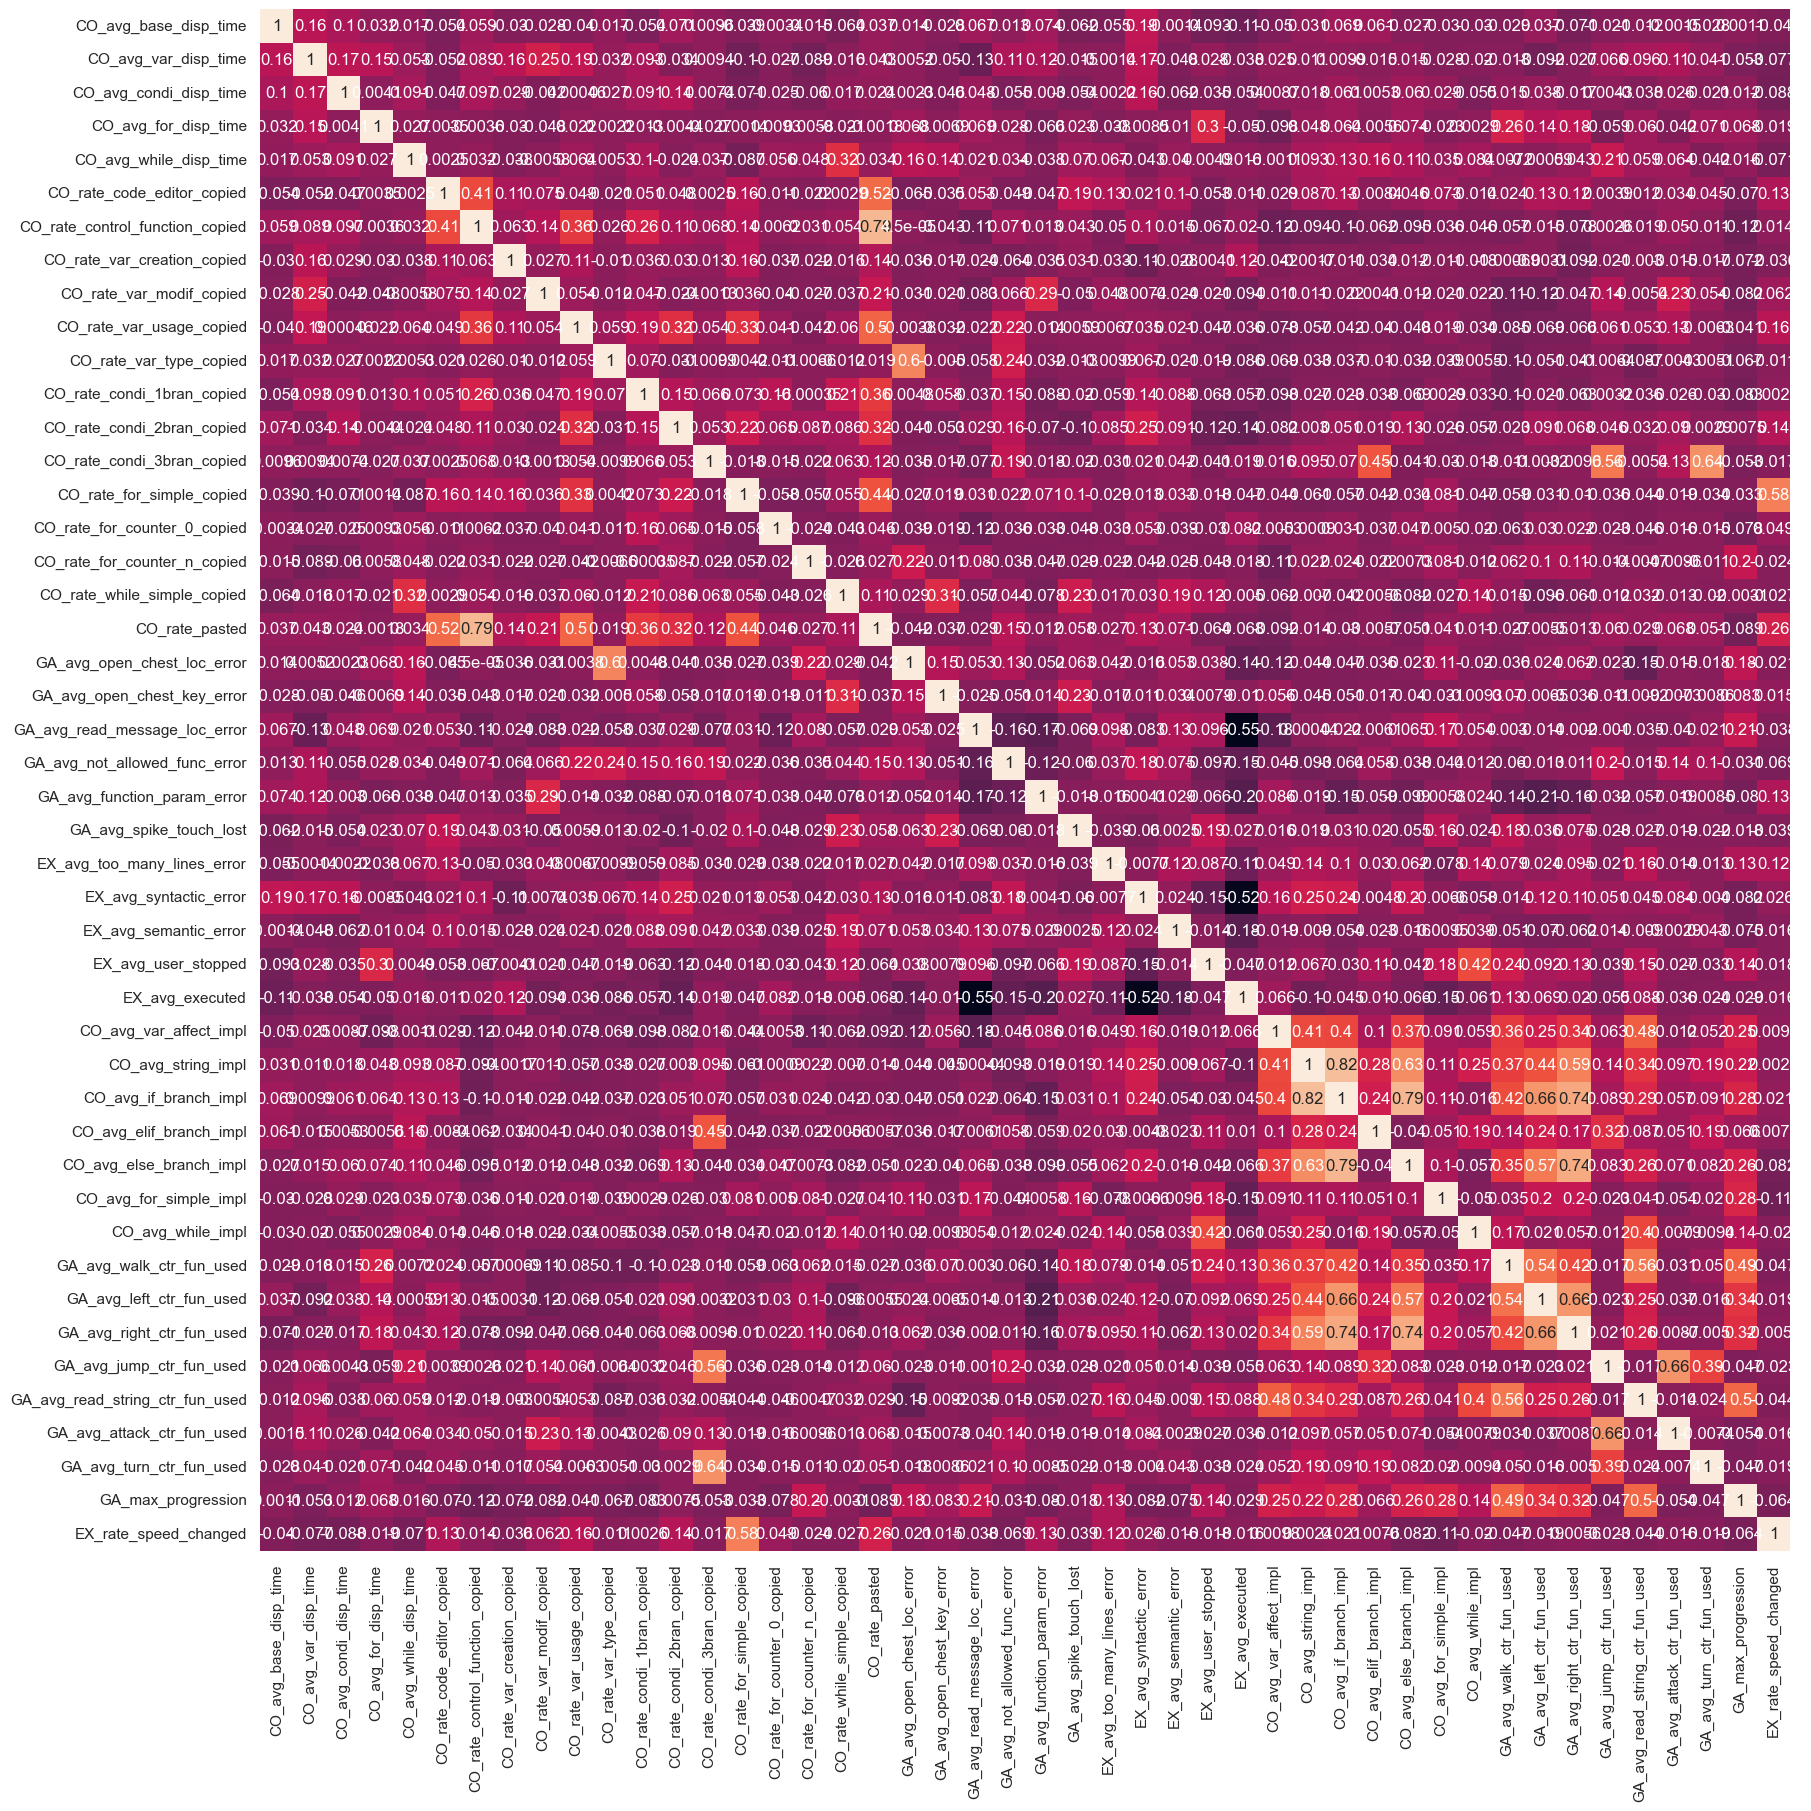

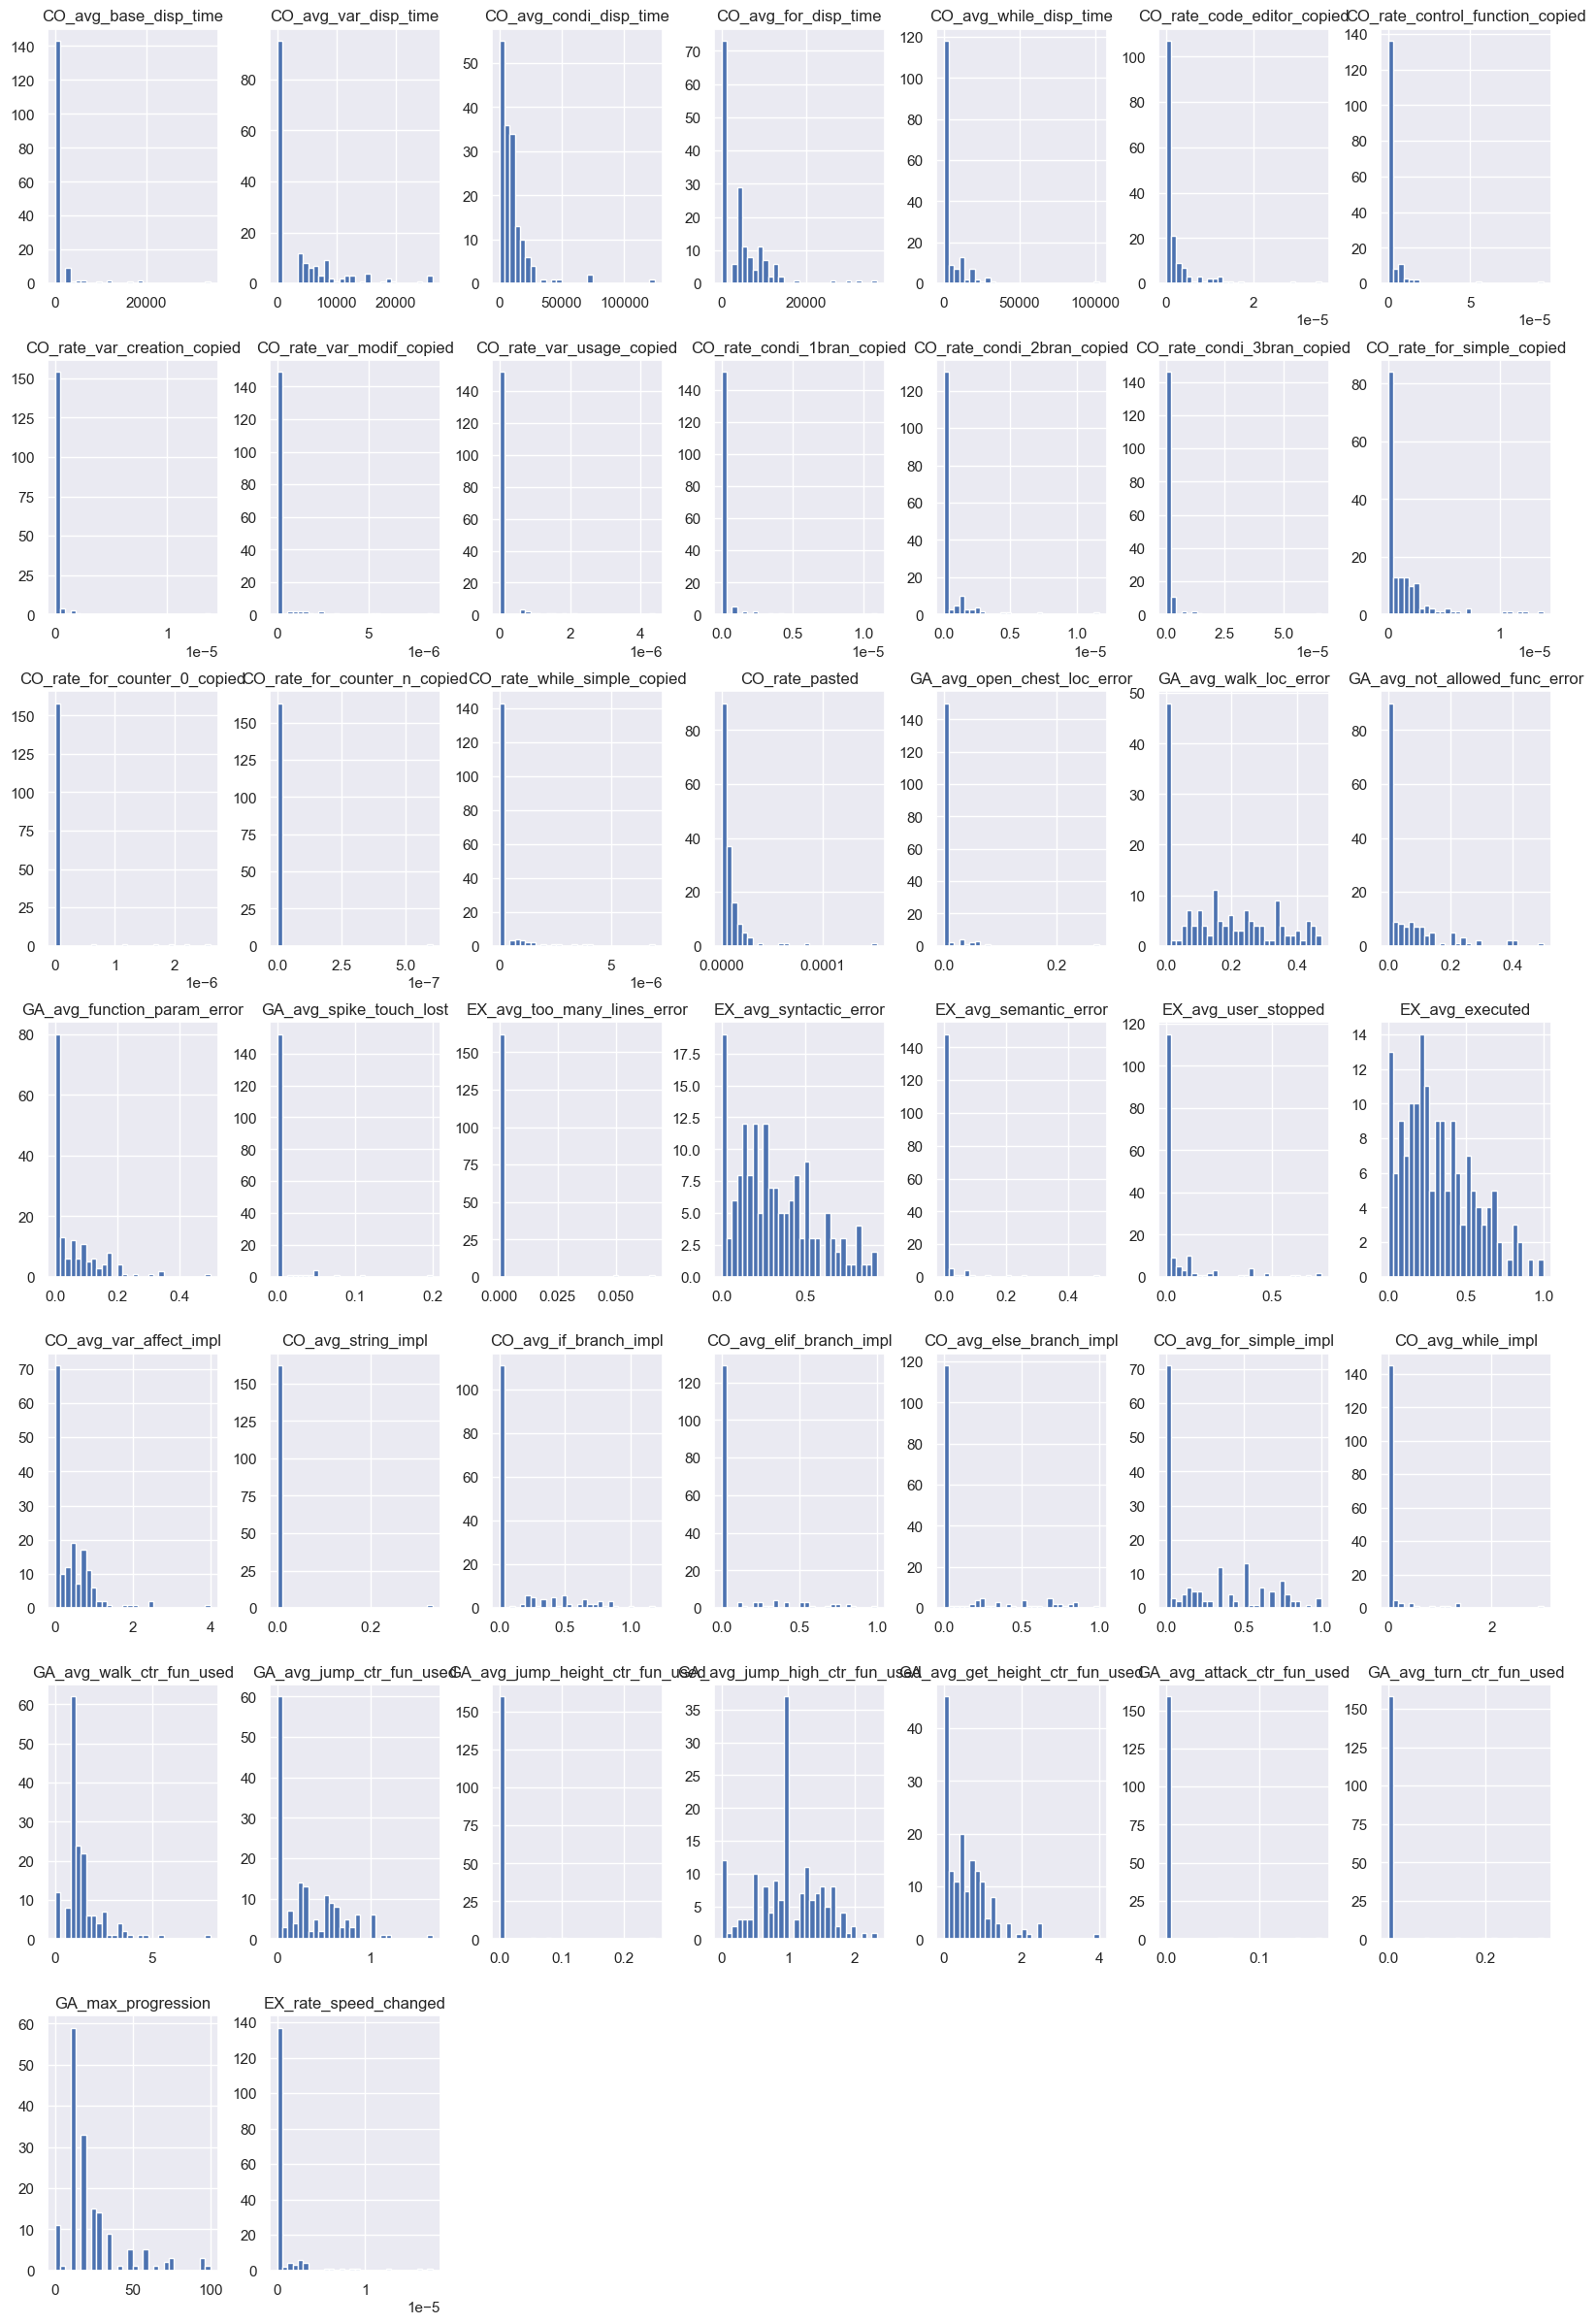

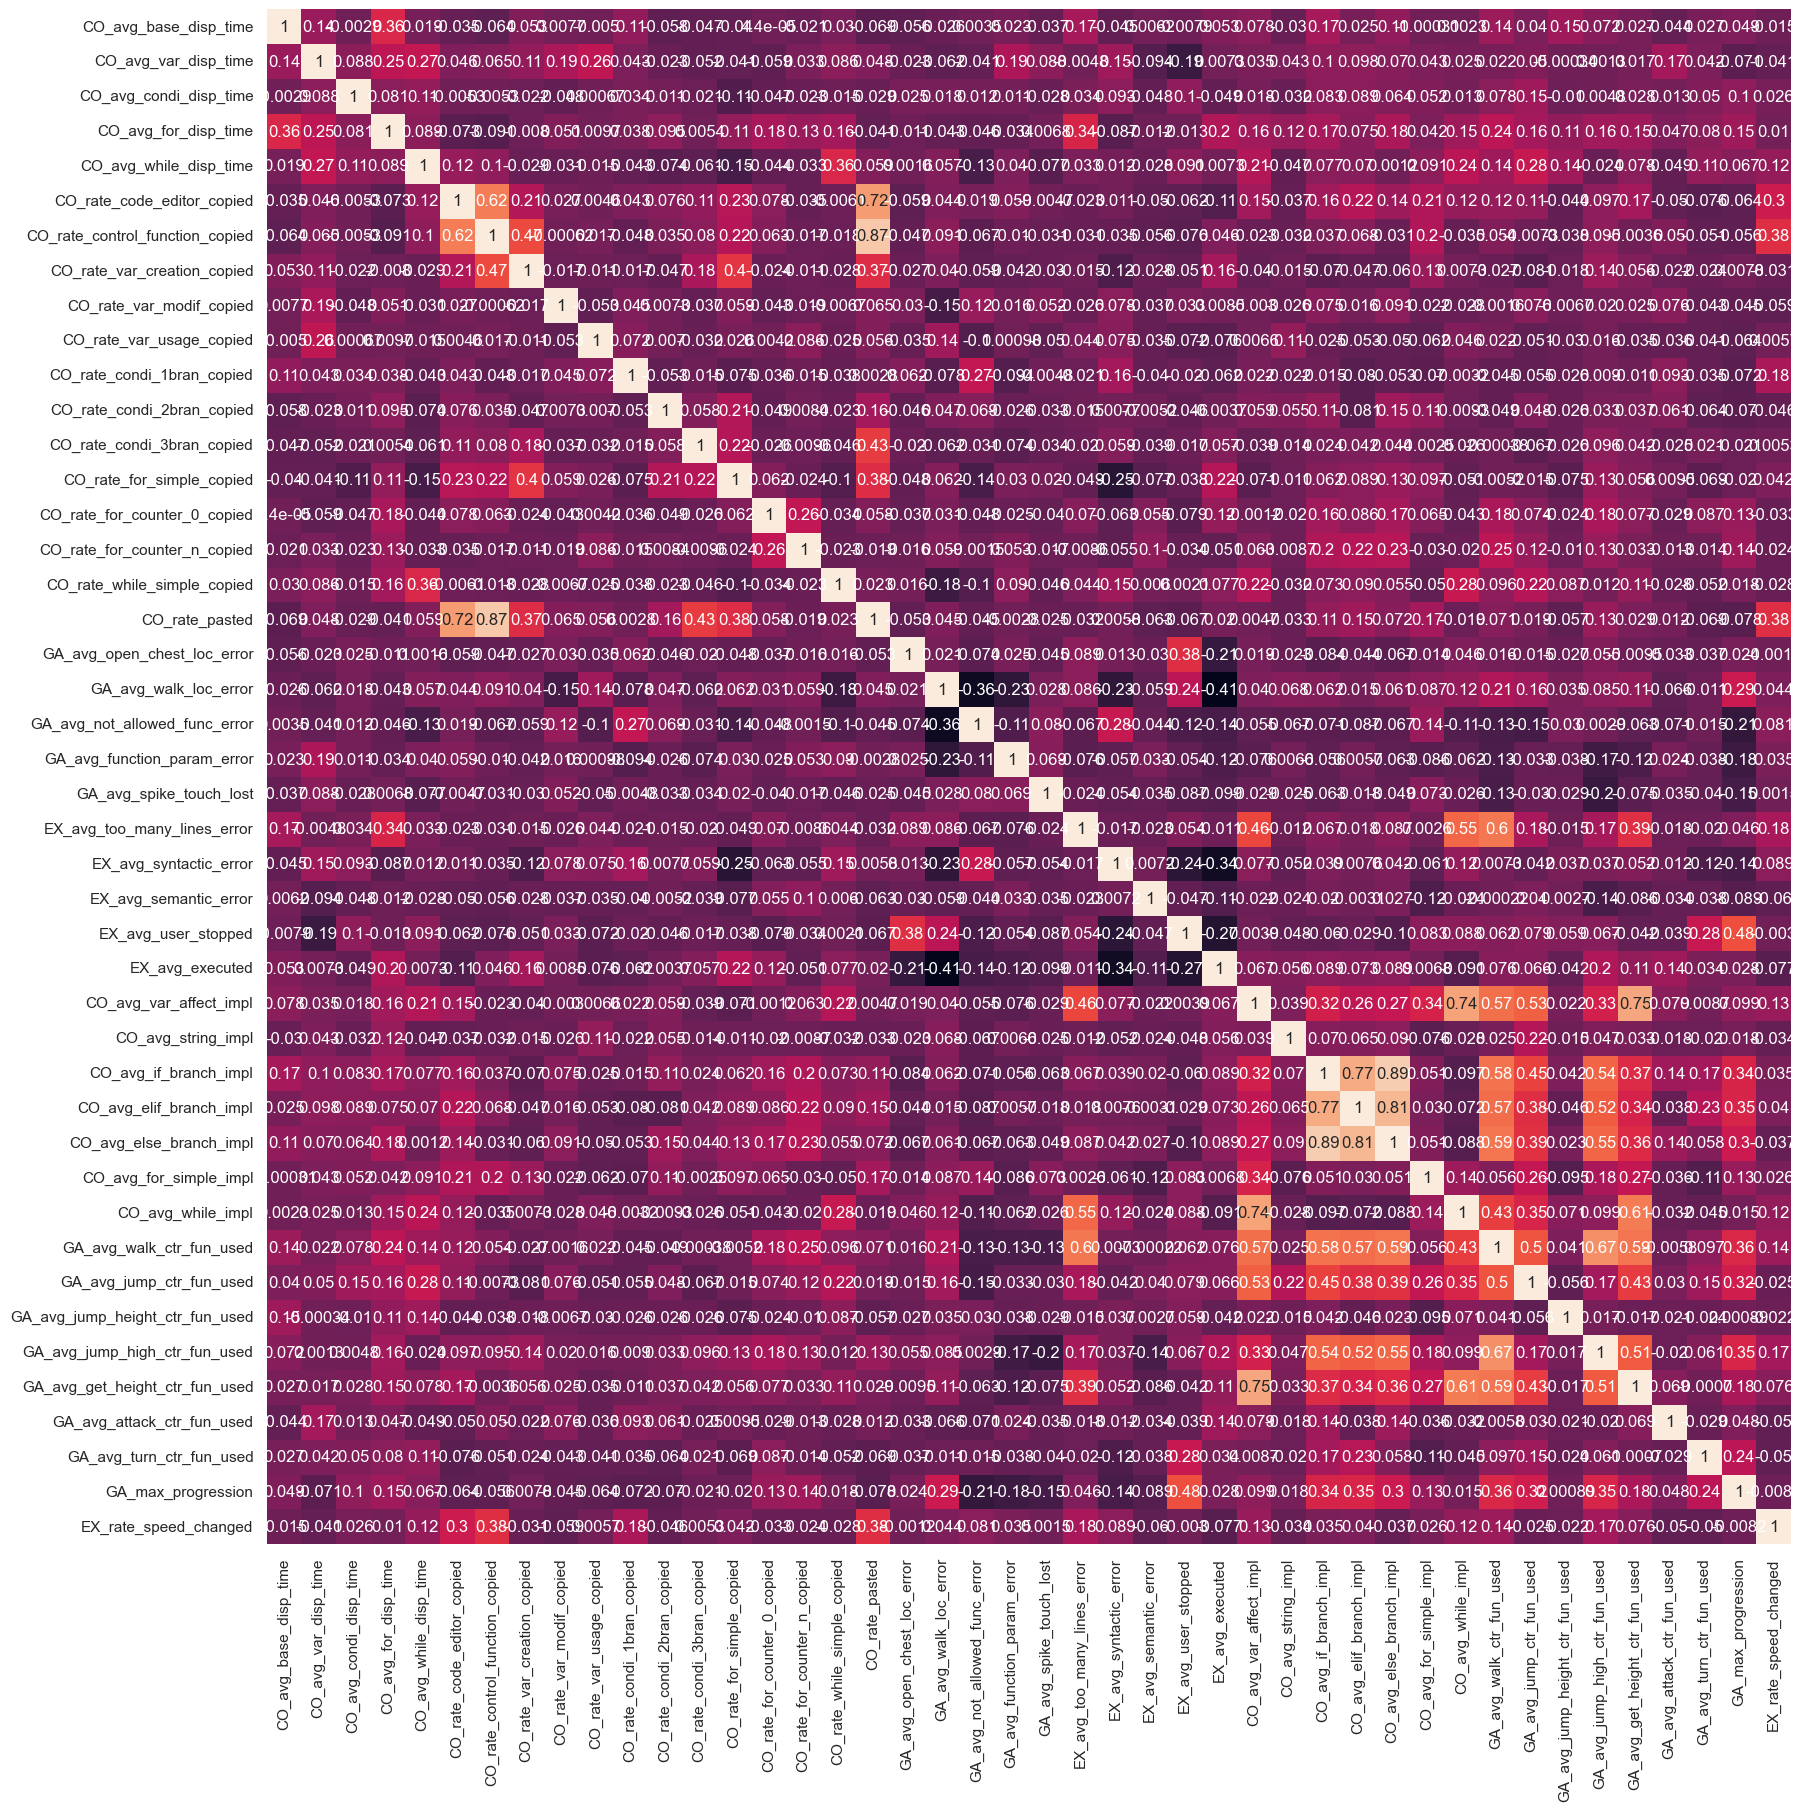

In [7]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    # Feature selection
    level_processed_dataframe = level_processed_dataframe[feature_set_columns]
    print(f"------------------ {level_key} ------------------")
    # fig, ax = plt.subplots(constrained_layout=True, figsize=[20,30])
    
    # Drop irrelevant feature (same values) for analysis
    unused_features = []
    for key in level_processed_dataframe.columns:
        nb_values = level_processed_dataframe[key].value_counts()
        if len(nb_values) < MIN_DIFFERENT_VALUES: 
            unused_features.append(key)
    print("Unused features: ")
    print(unused_features)
    print("Relevant features: ",len(level_processed_dataframe.columns)-len(unused_features))
    print("Total features: ", len(level_processed_dataframe.columns))
    
    relevant_level_processed_dataframe = level_processed_dataframe.drop(columns=unused_features)
    # Drop label
    relevant_level_processed_dataframe = relevant_level_processed_dataframe.drop(columns=[LABELS_KEY])

    print("Describe: ",relevant_level_processed_dataframe.describe())

    print("Histograms: ")
    relevant_level_processed_dataframe.hist(bins = 30, figsize=[20,30])
    # plt.savefig(f"images/hist_level_{level_key}.png", dpi=400)
    
    print("Correlation: ")
    corr_matrix = relevant_level_processed_dataframe.corr()
    fig, ax = plt.subplots(constrained_layout=True, figsize=[18,18])
    ax = sns.heatmap(corr_matrix, annot=True, cbar=False)
    # plt.savefig(f"images/correl_level_{level_key}.png", dpi=400)

### 5.6 Delete outliers

In [8]:
# Delete rows with too many executions (indicates a notion avoidance strategy :
# user playing with random)
MAX_EXECUTION_THRESHOLD = 200
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    nb_rows_before = level_processed_dataframe.shape[0]
    level_processed_dataframe = level_processed_dataframe.drop(level_processed_dataframe[level_processed_dataframe[NB_USER_STOPPED_EXECUTION_KEY] > MAX_EXECUTION_THRESHOLD].index)
    level_processed_dataframe = level_processed_dataframe.drop(level_processed_dataframe[level_processed_dataframe[NB_COMPLETED_EXECUTION_KEY] > MAX_EXECUTION_THRESHOLD].index)
    nb_rows_after = level_processed_dataframe.shape[0]
    print("Nb deleted rows: ",(nb_rows_before-nb_rows_after))


------------------ Level1 ------------------
Nb deleted rows:  0
------------------ Level3 ------------------
Nb deleted rows:  0
------------------ Level4 ------------------
Nb deleted rows:  0
------------------ Level5 ------------------
Nb deleted rows:  0


## 6) Data preparation

### 6.1 Create a test set over groups

In [9]:
levels_train_sets = {}
levels_test_sets = {}
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    # Feature selection
    level_processed_dataframe = level_processed_dataframe[feature_set_columns]
    print(f"------------------ {level_key} ------------------")
    # Detour of StratifiedGroupKFold to get stratified AND group aware train-test split
    cv = StratifiedGroupKFold(n_splits=int(1/TEST_SET_RATIO),shuffle=True, random_state = RANDOM_STATE_SEED)
    split_results = cv.split(level_processed_dataframe,y=level_processed_dataframe[LABELS_KEY], groups=level_processed_dataframe[GROUP_KEY])
    # for i in range(0):
    #     next(split_results)
    (level_train_set_index, level_test_set_index) = next(split_results)
    
    level_train_set = level_processed_dataframe.iloc[level_train_set_index]
    level_test_set = level_processed_dataframe.iloc[level_test_set_index]
    
    #  Display class distribution
    print("Train set size: ",len(level_train_set))
    # print("Train set label ratio: ")
    # train_counts = level_train_set[LABELS_KEY].value_counts(normalize=True).sort_index()
    # train_counts.plot(kind='bar')
    # plt.show()
    print("Test set size: ",len(level_test_set))
    # print("Test set label ratio: ")
    # test_counts = level_test_set[LABELS_KEY].value_counts(normalize=True).sort_index()
    # test_counts.plot(kind='bar')
    # plt.show()
    levels_train_sets[level_key]= level_train_set
    levels_test_sets[level_key]= level_test_set

------------------ Level1 ------------------
Train set size:  143
Test set size:  33
------------------ Level3 ------------------


Train set size:  330
Test set size:  78
------------------ Level4 ------------------
Train set size:  268
Test set size:  70
------------------ Level5 ------------------
Train set size:  127
Test set size:  37


### 6.2 Split features, labels and groups

In [10]:
def feature_label_group_split(dataset):
    dataset_features = dataset.drop(columns=[LABELS_KEY,GROUP_KEY])
    dataset_labels = dataset[LABELS_KEY].copy()
    dataset_groups = dataset[GROUP_KEY].copy()
    return (dataset_features, dataset_labels,dataset_groups)

def feature_label_split(dataset):
    dataset_features = dataset.drop(columns=[LABELS_KEY,GROUP_KEY])
    dataset_labels = dataset[LABELS_KEY].copy()
    return (dataset_features, dataset_labels)



### 6.3 Delete irrelevant features (no variance)

In [11]:
# Create a custom transformer to delete irrelevant features (all values are the same)
class DeleteIrrelevantFeatures(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or ** kargs
        pass
    def fit(self, X, y = None):
        self.unused_features = []
        for key in X.columns:
            nb_values = X[key].value_counts()
            if len(nb_values) < MIN_DIFFERENT_VALUES:
                # print("Deleted feature :",key)
                self.unused_features.append(key)
        # print("Remain features: ",len(X.columns)-len(self.unused_features))
        return self
    def transform(self, X, y = None):
        # print("Number of deleted features",len(self.unused_features))
        modified_X = X.drop(columns=self.unused_features)    
        return modified_X

### 6.3 Delete highly correlated features

In [12]:
# Create a custom transformer to delete highly correlated features
class DeleteCorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0.9): # no *args or ** kargs
        self.threshold = threshold
        self.to_drop = []
        
    def fit(self, X, y = None):
        if isinstance(X, pd.DataFrame):
            corr_matrix = X.corr().abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            self.to_drop = [column for column in upper.columns if any(upper[column] >= self.threshold)]
        else:
            corr_matrix = np.absolute(np.corrcoef(X, rowvar=False))
            upper = corr_matrix*np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
            self.to_drop = [column for column in range(upper.shape[1]) if any(upper[:,column] >= self.threshold)]
        print(self.to_drop)
        return self
    
    def transform(self, X, y = None):
        if isinstance(X, pd.DataFrame):
            X_reduced = X.drop(columns = self.to_drop)
        else:
            X_reduced = np.delete(X, self.to_drop, axis=1)
        return X_reduced


### 6.4 Discretize time feature (used for Naive Bayes Classifier)

In [13]:
# Create a custom transformer to discretize time features
class TimeSpendDiscretizer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or ** kargs
        pass
    def fit(self, X, y = None):
        self.discretizer = {}
        for time_feature in TIME_FEATURES_KEYS_TOTAL:
            if time_feature in X.columns:
                self.discretizer[time_feature] = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
                self.discretizer[time_feature].fit(X[[time_feature]])
        return self
    def transform(self, X, y = None):
        modified_X = X.copy()
        for time_feature in TIME_FEATURES_KEYS_TOTAL:
            if time_feature in modified_X.columns:
                modified_X[time_feature] = self.discretizer[time_feature].transform(modified_X[[time_feature]])
        return modified_X


### 6.5 Data Min-max scaling (used for SVM classifier)

In [14]:
data_scaler = MinMaxScaler()

## 7) Select a model

### 7.1 Model evaluation function (Stratified over groups K-Fold cross validation + F1 score)

In [15]:
def evaluate_model(pipeline,train_features,train_labels, train_groups):
    stratified_group_cross_val = StratifiedGroupKFold(n_splits=NB_FOLDS,shuffle = True, random_state = RANDOM_STATE_SEED)
    scoring = {
        "precision" : make_scorer(precision_score,average=METRIC,zero_division=ZERO_DIVISION), 
        "recall" : make_scorer(recall_score,average=METRIC,zero_division=ZERO_DIVISION),
        "f1_score" : make_scorer(f1_score, average=METRIC, zero_division=ZERO_DIVISION)
    }
    results = cross_validate(pipeline,train_features,train_labels,cv=stratified_group_cross_val, scoring = scoring, groups=train_groups)
    return results

### 7.2 Dummy Classifiers

In [16]:
dummy_random_clf_pipe = Pipeline([
    ("dummy_random_clf", DummyClassifier(strategy="uniform"))
])

### 7.3 Naive Bayes classifier (multinomial)

In [17]:
naive_bayes_clf_pipe = Pipeline([
    ("time_spend_discretizer",TimeSpendDiscretizer()),
    ("feature_deleter",DeleteIrrelevantFeatures()),
    ("features_correlated",DeleteCorrelatedFeatures(CORRELATION_THRESHOLD)),
    ("data_scaler", MinMaxScaler()),
    ("naive_bayes_clf", MultinomialNB())
])

### 7.4 Logistic regression classifier

In [18]:
logistic_regression_clf_pipe = Pipeline([
    ("feature_deleter",DeleteIrrelevantFeatures()),
    ("features_correlated",DeleteCorrelatedFeatures(CORRELATION_THRESHOLD)),
    ("data_scaler", MinMaxScaler()),
    ("logistic_regression_clf", LogisticRegression(random_state=RANDOM_STATE_SEED))
])

### 7.5 SVM Classifier

In [19]:
svm_clf_pipe = Pipeline([
    ("feature_deleter",DeleteIrrelevantFeatures()),
    ("features_correlated",DeleteCorrelatedFeatures(CORRELATION_THRESHOLD)),
    ("data_scaler", MinMaxScaler()),
    ("svm_gaussian_clf", SVC(kernel="rbf"))
])

### 7.6 Decision Tree / Random Forest Classifier

In [20]:
decision_tree_clf_pipe = Pipeline([
    ("feature_deleter",DeleteIrrelevantFeatures()),
    ("features_correlated",DeleteCorrelatedFeatures(CORRELATION_THRESHOLD)),
    ("data_scaler", MinMaxScaler()),
    ("decision_tree_clf", DecisionTreeClassifier(random_state = RANDOM_STATE_SEED))
])

random_forest_clf_pipe = Pipeline([
    ("feature_deleter",DeleteIrrelevantFeatures()),
    ("features_correlated",DeleteCorrelatedFeatures(CORRELATION_THRESHOLD)),
    ("data_scaler", MinMaxScaler()),
    ("random_forest_clf", RandomForestClassifier(random_state = RANDOM_STATE_SEED))
])

### 7.7 Models evaluation


In [21]:
classifiers = {
    "Random baseline": dummy_random_clf_pipe,
    "Naive Bayes": naive_bayes_clf_pipe,
    "Logistic regression":logistic_regression_clf_pipe,
    "SVM": svm_clf_pipe,
    "Decision Tree":decision_tree_clf_pipe,
    "Random Forest": random_forest_clf_pipe
}
levels_results = {}
for level_key, level_train_set in levels_train_sets.items():
    print(f"------------------ {level_key} ------------------")
    level_results = []
    level_train_set_features, level_train_set_labels, level_train_set_groups  = feature_label_group_split(level_train_set)
    for classifier_name, classifier in classifiers.items():
        csf_results = evaluate_model(classifier, level_train_set_features, level_train_set_labels, level_train_set_groups)
        level_results.append({
            "Precision_avg":csf_results["test_precision"].mean(),
            "Recall_avg":csf_results["test_recall"].mean(),
            "F1_score_avg":csf_results["test_f1_score"].mean(),
            "Precision_std":csf_results["test_precision"].std(),
            "Recall_std":csf_results["test_recall"].std(),
            "F1_score_std":csf_results["test_f1_score"].std(),
        })
    level_results_dataframe = pd.DataFrame(level_results,index=classifiers.keys())
    levels_results[level_key] = level_results_dataframe
    print("Done")

------------------ Level1 ------------------
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_for_counter_n_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']


['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_for_counter_n_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_for_counter_n_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_while_simple_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied', 'CO_rate_for_counter_n_copied', 'GA_avg_right_ctr_fun_used']
['CO_rate_var_modif_copied

### 7.7 Results displaying

------------------ Level1 ------------------


Best classifier : Random Forest, F1_score : 0.6839287593149486
------------------ Level3 ------------------
Best classifier : Random Forest, F1_score : 0.580484645508548
------------------ Level4 ------------------
Best classifier : Random Forest, F1_score : 0.6690589099403238
------------------ Level5 ------------------
Best classifier : Random Forest, F1_score : 0.5123027665298047


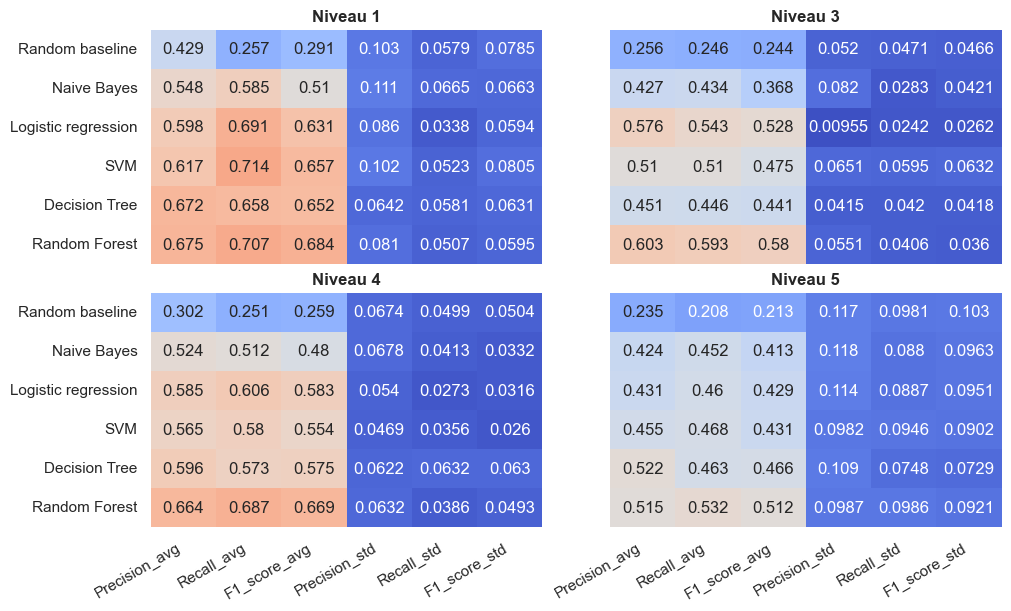

In [22]:
levels_best_classifier_score = {}

fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=[10,6])
index = 0

for level_key, level_results in levels_results.items():
    print(f"------------------ {level_key} ------------------")
    col = index % 2
    row = index // 2
    cbar = False
    if col == 2:
        cbar= True
    sns.heatmap(level_results, ax = axs[row,col], vmin=0, vmax=1,cmap="coolwarm", annot=True,fmt=".3g", cbar=cbar)
    axs[row,col].set_title(LEVEL_TRANSLATION[level_key],fontweight='bold')
    if row == 0 :
        axs[row,col].get_xaxis().set_visible(False)
    else :     
        for label in axs[row,col].get_xticklabels():
            label.set_ha("right")
            label.set_rotation(30)
    if col !=0 :
        axs[row,col].get_yaxis().set_visible(False)
    
    best_classifier = level_results.sort_values(by=["F1_score_avg"], ascending=False).iloc[0]
    levels_best_classifier_score[level_key] = best_classifier[2]
    print(f"Best classifier : {best_classifier.name}, F1_score : {best_classifier[2]}")
    index += 1
# plt.show()
plt.savefig("images/models_scores.png",dpi=300)


## 8) Fine tune selected model (Random Forest)

### 8.1 Grid search (n_estimators, max_depth)

In [23]:

levels_best_classifiers = {}

stratified_group_cross_val = StratifiedGroupKFold(n_splits=NB_FOLDS,shuffle = True, random_state = RANDOM_STATE_SEED)

param_grid = [{
    # Default : 100
    "random_forest_clf__n_estimators": [10, 50, 100, 150, 200, 250, 300],
    # "random_forest_clf__n_estimators": [100],
    # Default = None
    "random_forest_clf__max_depth" : [5,10,15,20,25,30,35,40,45,50,55,60,None],
    # "random_forest_clf__max_depth" : [None],
}]

grid_search = GridSearchCV( 
    estimator = random_forest_clf_pipe,
    param_grid= param_grid,
    cv = stratified_group_cross_val,
    verbose = 1,
    scoring ="f1_"+METRIC,
    n_jobs=-1)

for level_key, level_train_set in levels_train_sets.items():
    print(f"------------------ {level_key} ------------------")
    
    level_train_set_features, level_train_set_labels, level_train_set_groups = feature_label_group_split(level_train_set)
    grid_search.fit(level_train_set_features,y=level_train_set_labels, groups=level_train_set_groups)
    print(f"Best score: {grid_search.best_score_}, Untuned Score: {levels_best_classifier_score[level_key]}, Delta: {grid_search.best_score_-levels_best_classifier_score[level_key]}")
    print("Best params: ",grid_search.best_params_)
    levels_best_classifiers[level_key] = deepcopy(grid_search.best_estimator_)


------------------ Level1 ------------------
Fitting 5 folds for each of 91 candidates, totalling 455 fits
['CO_rate_var_modif_copied', 'GA_avg_right_ctr_fun_used']
Best score: 0.7175032728158729, Untuned Score: 0.6839287593149486, Delta: 0.03357451350092433
Best params:  {'random_forest_clf__max_depth': 15, 'random_forest_clf__n_estimators': 50}
------------------ Level3 ------------------
Fitting 5 folds for each of 91 candidates, totalling 455 fits
['CO_rate_while_simple_copied', 'CO_rate_pasted', 'GA_avg_jump_ctr_fun_used', 'GA_avg_attack_ctr_fun_used']
Best score: 0.5930456154322762, Untuned Score: 0.580484645508548, Delta: 0.012560969923728238
Best params:  {'random_forest_clf__max_depth': 25, 'random_forest_clf__n_estimators': 300}
------------------ Level4 ------------------
Fitting 5 folds for each of 91 candidates, totalling 455 fits
['CO_avg_if_branch_impl']
Best score: 0.6893907702749889, Untuned Score: 0.6690589099403238, Delta: 0.020331860334665053
Best params:  {'random_

## 9) Try best model on test set

### 9.1 Predictions

In [24]:

levels_test_set_results = []
levels_test_set_labels = {}
levels_test_set_predictions = {}
levels_test_set_scores = {}
for level_key, level_test_set in levels_test_sets.items():
    print(f"------------------ {level_key} ------------------")
    level_best_classifier = levels_best_classifiers[level_key]
    level_test_set_features, level_test_set_labels = feature_label_split(level_test_set)
    levels_test_set_labels[level_key] = level_test_set_labels
    level_test_prediction = level_best_classifier.predict(level_test_set_features)
    levels_test_set_predictions[level_key] = level_test_prediction
    
    level_precision_score = precision_score(level_test_set_labels, level_test_prediction, average=METRIC, zero_division=ZERO_DIVISION)
    level_recall_score = recall_score(level_test_set_labels, level_test_prediction, average=METRIC)
    level_f1_score = f1_score(level_test_set_labels, level_test_prediction, average=METRIC)
    
    levels_test_set_scores[level_key] = [[level_precision_score, level_recall_score, level_f1_score]]
    
    levels_test_set_results.append({"Precision":level_precision_score,"Recall":level_recall_score,"F1_score":level_f1_score})
    
    print("Done")

    # ----- Extract a data points for webservice testing purpose ----- 
    json_help1_instance = level_test_set[level_test_set[LABELS_KEY]==1].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    print("json_help1_instance: ",json_help1_instance)
    json_help2_instance = level_test_set[level_test_set[LABELS_KEY]==2].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    print("json_help2_instance: ",json_help2_instance)
    json_help3_instance = level_test_set[level_test_set[LABELS_KEY]==3].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    print("json_help3_instance: ",json_help3_instance)
    json_help4_instance = level_test_set[level_test_set[LABELS_KEY]==4].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    print("json_help4_instance: ",json_help4_instance)
    # -----------------------------------------------------------------------------------

levels_test_set_results_dataframe = pd.DataFrame(levels_test_set_results,index=levels_test_sets.keys())

------------------ Level1 ------------------
Done
json_help1_instance:  {"CO_avg_base_disp_time":0.0,"CO_avg_var_disp_time":5316.5,"CO_avg_condi_disp_time":0.0,"CO_avg_for_disp_time":0.0,"CO_avg_while_disp_time":0.0,"CO_rate_code_editor_copied":0.0000040123,"CO_rate_control_function_copied":0.0,"CO_rate_base_program_copied":0.0,"CO_rate_base_error_copied":0.0,"CO_rate_base_structuration_copied":0.0,"CO_rate_base_comment_copied":0.0,"CO_rate_var_creation_copied":0.0000040123,"CO_rate_var_modif_copied":0.0,"CO_rate_var_usage_copied":0.0,"CO_rate_var_type_copied":0.0,"CO_rate_condi_1bran_copied":0.0,"CO_rate_condi_2bran_copied":0.0,"CO_rate_condi_3bran_copied":0.0,"CO_rate_for_simple_copied":0.0,"CO_rate_for_counter_0_copied":0.0,"CO_rate_for_counter_n_copied":0.0,"CO_rate_while_simple_copied":0.0,"CO_rate_pasted":0.000012037,"GA_avg_open_chest_loc_error":0.2,"GA_avg_open_chest_key_error":0.0,"GA_avg_read_message_loc_error":0.0,"GA_avg_walk_loc_error":0.0,"GA_avg_not_allowed_func_error":0

### 9.2 Results displaying

------------------ Level1 ------------------
------------------ Level3 ------------------
------------------ Level4 ------------------
------------------ Level5 ------------------


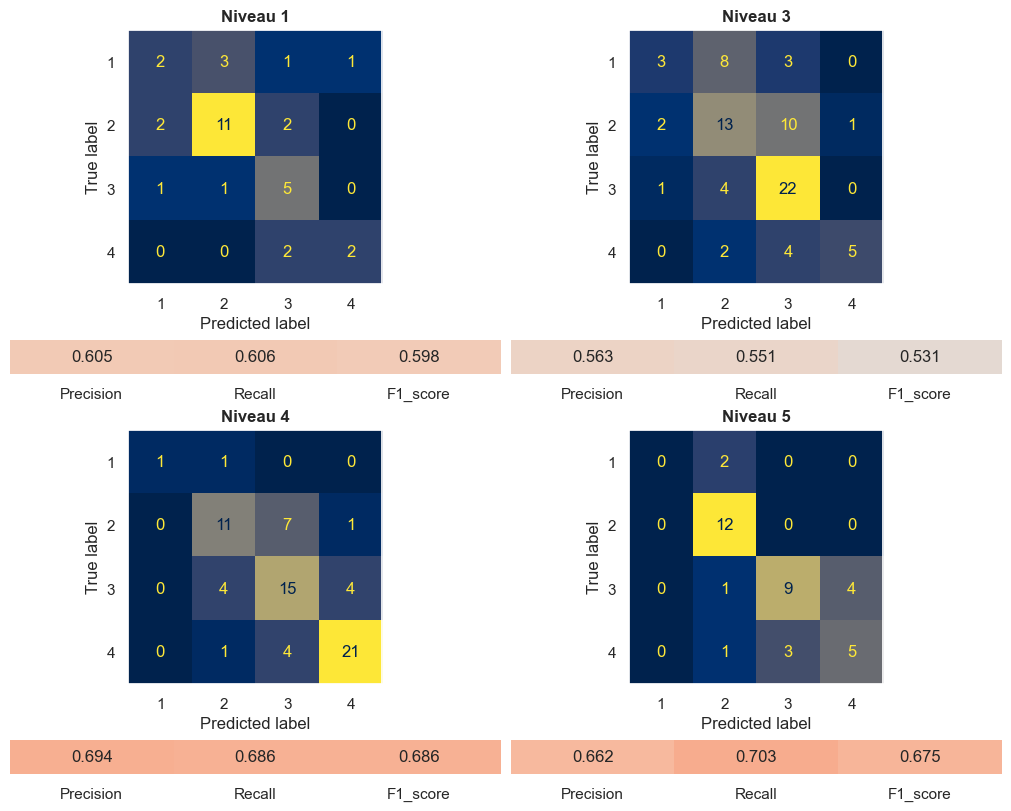

In [27]:
fig, axs = plt.subplots(4,2, constrained_layout=True,figsize=[10,8],gridspec_kw={'height_ratios': [3,0.4,3,0.4]})
index = 0

for level_key, level_test_set_scores in levels_test_set_scores.items():
    print(f"------------------ {level_key} ------------------")
    col = index % 2
    row = index // 2
    level_test_set_labels = levels_test_set_labels[level_key]
    level_test_set_predictions = levels_test_set_predictions[level_key]
    ConfusionMatrixDisplay.from_predictions(level_test_set_labels, level_test_set_predictions, ax = axs[2*row,col], colorbar = False, cmap="cividis", labels=[1,2,3,4])
    
    axs[2*row,col].grid(False)
    axs[2*row,col].set_title(LEVEL_TRANSLATION[level_key],fontweight='bold')
    sns.heatmap(level_test_set_scores, yticklabels= [""], xticklabels= ["Precision","Recall","F1_score"], vmin=0, vmax=1,cmap="coolwarm", annot=True,fmt=".3g", cbar=False, ax=axs[2*row+1,col])
    index +=1
# plt.show()
plt.savefig("images/testset_scores.png",dpi=300)


## 10) Features importances

### 10.1 MDI Importance (Mean Decrease in Impurity)

Random Forest impurity-based feature importances. Impurity is quantified by the splitting criterion of the decision trees (Gini, Entropy or Mean Squared Error): https://scikit-learn.org/stable/modules/ensemble.html#random-forest-feature-importance

/!\ Impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories.

------------------ Level1 ------------------
32
------------------ Level3 ------------------
35
------------------ Level4 ------------------
44
------------------ Level5 ------------------
41


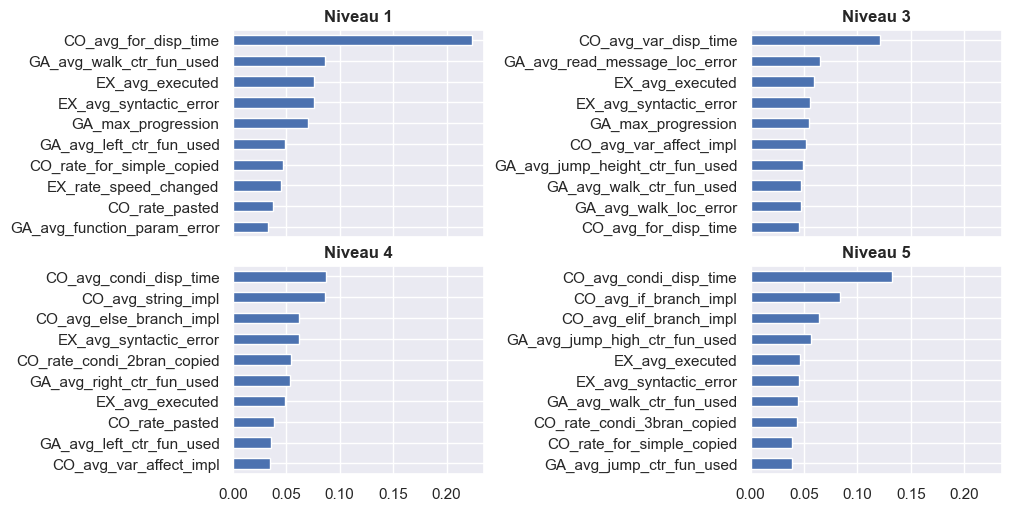

In [28]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=[10,5])
index = 0
for level_key, level_best_classifier in levels_best_classifiers.items():
    print(f"------------------ {level_key} ------------------")
    print(level_best_classifier["random_forest_clf"].n_features_in_)
    level_features_importances = level_best_classifier["random_forest_clf"].feature_importances_
    level_features = level_best_classifier["data_scaler"].feature_names_in_
    level_features_importances_series = pd.Series(level_features_importances, index=level_features)
    level_features_importances_series = level_features_importances_series.sort_values(ascending=False)  
    level_features_importances_series = level_features_importances_series.head(10)
    
    col = index % 2
    row = index // 2
    level_features_importances_series.plot.barh(ax = axs[row,col])
    axs[row,col].invert_yaxis()
    axs[row,col].set_xlim([0, 0.235])
    axs[row,col].set_xticks([0,0.05,0.1,0.15,0.2])
    if row != 1:
        axs[row,col].set_xticklabels(["","","","",""])
    axs[row,col].set_title(LEVEL_TRANSLATION[level_key], fontweight='bold')
    index += 1
# plt.show()
plt.savefig("images/features_MDI_importance.png",dpi=300)


### 10.2 Permutation importance

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled : https://scikit-learn.org/stable/modules/permutation_importance.html

/!\ When two features are correlated and one of the features is permuted, the model will still have access to the feature through its correlated feature. This will result in a lower importance value for both features, where they might actually be important.

------------------ Level1 ------------------
------------------ Level3 ------------------
------------------ Level4 ------------------
------------------ Level5 ------------------


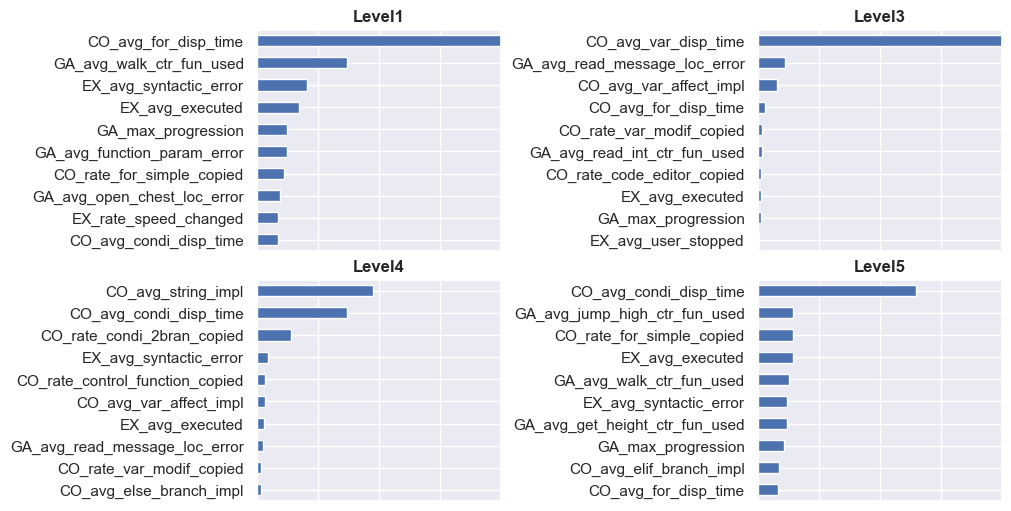

In [29]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=[10,5])
index = 0
for level_key, level_best_classifier in levels_best_classifiers.items():
    # Feature selection
    level_processed_dataframe = level_processed_dataframe[feature_set_columns]
    print(f"------------------ {level_key} ------------------")
    level_train_set_features, level_train_set_labels, level_train_set_groups = feature_label_group_split(levels_train_sets[level_key])
    level_permutation_importance = permutation_importance(level_best_classifier, level_train_set_features, level_train_set_labels,scoring="f1_"+METRIC, n_repeats=10,random_state=RANDOM_STATE_SEED, n_jobs=-1)
    level_features_importances = level_permutation_importance.importances_mean
    level_features_importances_series = pd.Series(level_features_importances, index=level_train_set_features.keys())
    level_features_importances_series = level_features_importances_series.sort_values(ascending=False)  
    level_features_importances_series = level_features_importances_series.head(10)
    
    col = index % 2
    row = index // 2
    
    level_features_importances_series.plot.barh(ax = axs[row,col])
    axs[row,col].invert_yaxis()
    # axs[row,col].set_xlim([0, 0.1])
    axs[row,col].set_xlim([0, 0.2])
    # axs[row,col].set_xticks([0,0.025,0.05,0.075,0.1])
    axs[row,col].set_xticks([0,0.05,0.1,0.15,0.2])
    if row != 2:
        axs[row,col].set_xticklabels(["","","","",""])
    axs[row,col].set_title(level_key, fontweight='bold')
    index += 1
plt.show()
# plt.savefig("exportedFigures/featuresPermutationImportances.png",dpi=300)


    

## 11) Model exportation

In [30]:
for level_key, level_best_classifier in levels_best_classifiers.items():
     print(f"------------------ {level_key} ------------------")
     model_filename = f"models/{level_key.lower()}_model.joblib"
     with open(model_filename,"wb") as f:
         dump(level_best_classifier, f) 
     print(f"Exportation of {model_filename} done")

------------------ Level1 ------------------
Exportation of models/level1_model.joblib done
------------------ Level3 ------------------
Exportation of models/level3_model.joblib done
------------------ Level4 ------------------
Exportation of models/level4_model.joblib done
------------------ Level5 ------------------
Exportation of models/level5_model.joblib done
